# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

# Содержание файла с данными

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

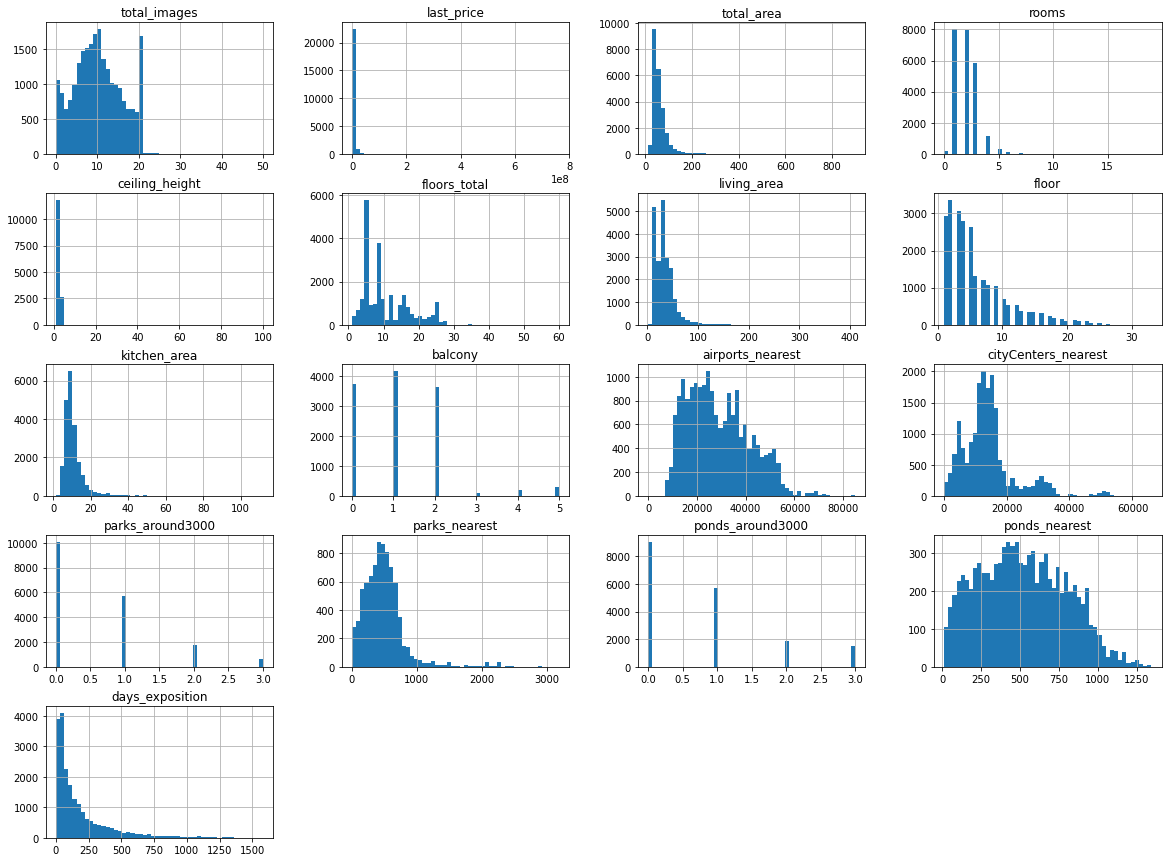

In [4]:
data.hist( bins = 50, figsize=(20, 15))
plt.show()

В подавляющем большинстве случаев распределение выглядит нормальным, однако заметны выбросы.

In [5]:
data.describe(percentiles=[0.05,0.25,0.5, 0.75,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,1.0,6.00,9.00,14.0,20.00,2.000000e+01,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,1870000.0,3400000.00,4650000.00,6800000.0,15300000.00,3.600000e+07,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,31.0,40.00,52.00,69.9,116.00,1.972140e+02,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.0,1.00,2.00,3.0,4.00,5.000000e+00,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.5,2.52,2.65,2.8,3.30,3.829700e+00,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,4.0,5.00,9.00,16.0,25.00,2.600000e+01,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,15.2,18.60,30.00,42.3,69.00,1.200000e+02,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,1.0,2.00,4.00,8.0,16.00,2.300000e+01,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,5.5,7.00,9.10,12.0,20.00,3.509000e+01,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.0,0.00,1.00,2.0,2.00,5.000000e+00,5.0


In [6]:
data.duplicated().sum()

0

База данных содержит 23699 записи о недвижимости, с 22 характеристиками. В соответствии с техническим заданием:
- `airports_nearest` - расстояние до ближайшего аэропорта (м);
- `balcony` - количество балконов;
- `ceiling_height` - высота потолков (м);
- `cityCenters_nearest` - расстояние до центра города (м);
- `days_exposition` - время существования объявление (дней);
- `first_day)exposition` - дата публикации;
- `floor` - этаж;
- `floors_total` - всего этажей в доме;
- `is apartment` - апартамент (True/False);
- `kitchen_area` - площадь кухни (м^2) 
- `last_price` - цена на момент публикации;
- `living_area` - жилая площадь (м^2);
- `locality_name` - название населенного пункта;
- `open_plan` - свободная планировка (True/False);
- `parks_around3000` - число парков в радиусе 3 км;
- `parks_nearest` - расстояние до ближайшего парка (м);
- `ponds_around3000` - число водоемов в радиусе 3 км;
- `ponds_nearest` - расстояние до ближайшего водоема (м);
- `rooms` - число комнат;
- `studio ` - квартира-студия (True/False);
- `total_area` - общая площадь квартры (м^2);
- `total_images` - число фотографий квартиры в объявлении.

Явных дубликатов не выявлено. Присутствует большое количество пропущенных значений, а также найдены сомнительные значения и выбросы.

## Предварительный анализ

In [7]:
#проценты неопределенных значений
(data.isna().mean()[data.isna().mean()>0]*100).round(2)

ceiling_height         38.80
floors_total            0.36
living_area             8.03
is_apartment           88.29
kitchen_area            9.61
balcony                48.61
locality_name           0.21
airports_nearest       23.38
cityCenters_nearest    23.29
parks_around3000       23.28
parks_nearest          65.91
ponds_around3000       23.28
ponds_nearest          61.56
days_exposition        13.42
dtype: float64

In [8]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

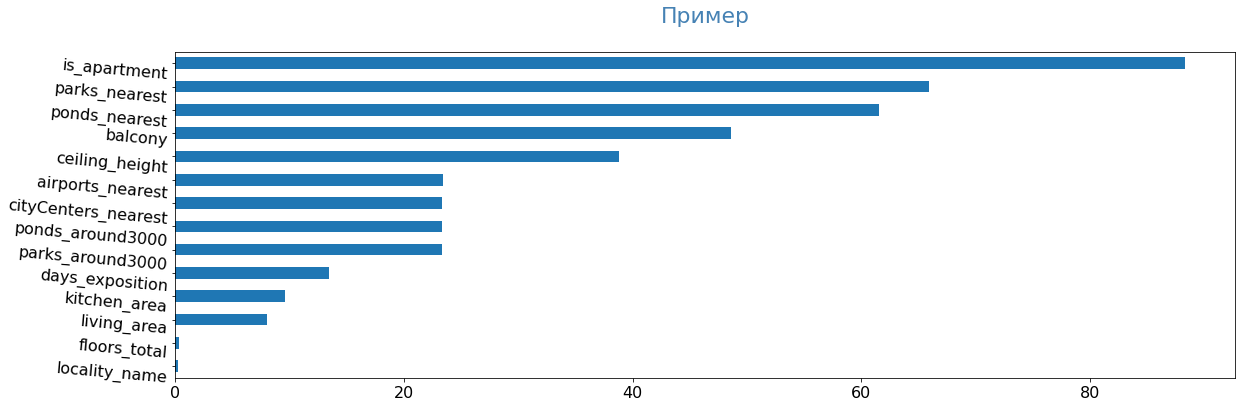

In [9]:
pass_value_barh(data)

#### Цена квартиры 

`last_price` заполнена значениями типа `float`.

#### Высота потолка

У около 40% объектов отсутвует высота потолка, а минимальные и максимальные значения некоторых объектов вызывает сомнения. Из совокупности данных факторов можно сделать вывод, что пользователи не уделяют внимания высоте потолков при развещении объявления.

In [10]:
#неопр. значения
print('N/A:', data['ceiling_height'].isna().sum())
#высота до 2.2 и от 6 м
print('Сомнительные значения:', len(data[(data['ceiling_height']>6) | (data['ceiling_height']<2.2)]))

N/A: 9195
Сомнительные значения: 43


<AxesSubplot:>

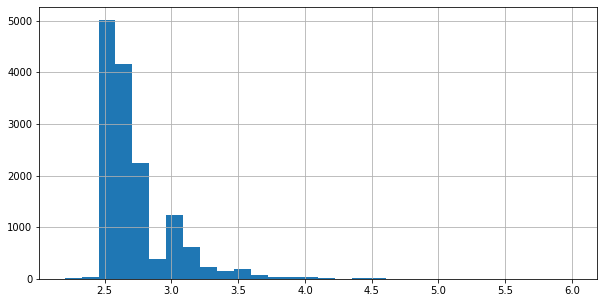

In [11]:
#распределение высот нормальных значений
data['ceiling_height'].hist(bins=30, figsize=(10,5), range=(2.2, 6))

Большинство объектов имеют высоту от 2.5 до 3. Тип данных - `float`. Часть пользователей могла поставить точку не в том месте, из-за чего высота потолков некоторых объектов > 22. В таких случаях перенесем точку. В случаях, когда высота меньше 2.2, заполним недостающее значение медианным.

#### Этажей в доме

У некоторых объектов отсутствует информация о количестве этажей в доме.

#### Жилая площадь и площадь кухни

У части объектов отсутствуют значения жилой площади и площади кухни:
- Жилая площадь - 8%;
- Площадь кухни - 9%.

Можем сделать предположение, что в данных случаях квартиры являются студиями или имеют свободную планировку

In [12]:
#квартиры с неуказанной жилой площадью и не являющиеся студиями
len(data[ (data['living_area'].isna()) & (data['studio']==False)])

1893

In [13]:
#квартиры с неуказанной жилой площадью без открытой планировки
len(data[ (data['living_area'].isna()) & (data['open_plan']==False)])

1898

In [14]:
#квартиры с неуказанной жилой площадью, не являющиеся студиями и без открытой планировки
len(data[ (data['living_area'].isna()) & (data['open_plan']==False) & (data['studio']==False)])/len(data)

0.07966580868391071

В большинстве случаев пропуска данных полей квартиры не являются студиями или не имеют открытую планировку.

#### Апартаменты и балконы

В 88% случаев значения в стобце `is_apartment` неопределенны. Также у около половины объектов не указана информация о наличии балкона. Предполагается, что в данных случаях было введено, равное "нет", так как тип данных в столбце булев.

#### Центры, аэропорты, парки и пруды

 - `cityCenters_nearest` - 23% пропусков;
 - `parks_around3000` - 23% пропусков;
 - `ponds_around3000` - 23% пропусков;
 - `airports_nearest` - 23% пропусков.
 - `parks_nearest` - 65% пропусков;
 - `ponds_nearest` - 61% пропусков.
 
 Наличие одинаковых процентов пропусков говорит о технической ошибке во время совмещения баз данных. Заполнить пропуски в данных случаях не представляется возможным, так как отсутствует точный адрес. Также часть столбцов надо привести к змеиному регистру.

#### Название насленного пункта

Меньше чем у 1% объектов отсутвует название населенного пункта. Заполнить такие пропуски невозможно.

#### Дата размещения объявления

Формат даты размещения включает в себя и время. В данном случае наличие времени не требуется

#### Вывод

Необходимо:

    - Перевести цены квартир в тысячи;
    - Изменить значения высоты потолков;
    - Заполнить пропуски в столбцах,обозначающих апартаменты и наличие балконов;
    - Исправить названия населенных пунктов;
    - Перевести названия столбцов к змеиному регистру;
    - Привести данные типа `float` к типу `int`.

В столбцах, обозначающих расстояния от дома до определенных объектов, и в столбце с обозначением количества этажей в доме отсутствуют значения. Это может быть связано с ошибкой в заполнении базы данных. Заполнить такие значения не является возможным. Рекомендуется создать БД с типовыми данными для автоматического заполнения полей.

### Предобработка данных

In [15]:
#формирование df для редактирования
df = data.copy()

#### Высота потолков

In [16]:
# check
df[df['ceiling_height']<2.2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.5,6,NaN,...,6.50,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.0,4,NaN,...,6.00,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.6,9,NaN,...,8.80,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5.0,NaN,5,NaN,...,NaN,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17.0,15.2,12,NaN,...,10.10,0.0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
16446,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5.0,63.9,2,NaN,...,12.00,NaN,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
16884,0,1500000.0,33.00,2018-10-03T00:00:00,1,2.00,5.0,20.0,5,False,...,6.00,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0
16934,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
19098,7,2700000.0,56.00,2018-02-04T00:00:00,3,2.00,5.0,46.0,1,NaN,...,6.00,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,282.0


In [17]:
#деление на 10 при высоте >20 и < 40
df.loc[(
    (df['ceiling_height']>20) & (df['ceiling_height']<100)
        ), 'ceiling_height'] = (df.loc[(
    (df['ceiling_height']>20) & (df['ceiling_height']<40)
        ), 'ceiling_height']/10)
    
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
#замена <2.2 на медианные
df.loc[df['ceiling_height']<2.2, 'ceiling_height'] = df['ceiling_height'].median()

In [19]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.703748
std          0.688098
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [20]:
#подсчет доли квартир с высотой потолков больше 4
df[df['ceiling_height']>4].ceiling_height.count()/df['ceiling_height'].count()

0.002278577155154226

В базе данных присутствуют квартиры с высотой потолков более 4 метров - их доля от всего массива данных составляет менее 1%, что значит, что такие объявления не входят в интересующий нас промежуток значений.

In [21]:
df=df[df['ceiling_height']<=4]

In [22]:
df['ceiling_height'].describe()

count    23645.000000
mean         2.693615
std          0.204134
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

#### Комнаты

In [23]:
df['rooms'].describe()

count    23645.000000
mean         2.068513
std          1.075736
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

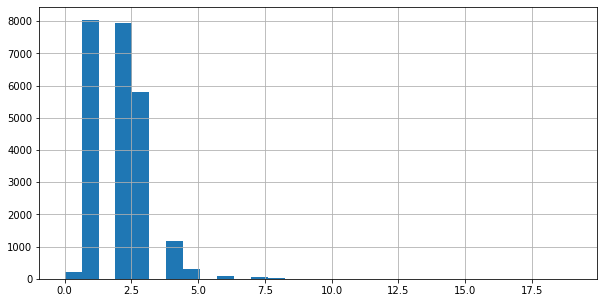

In [24]:
df['rooms'].hist(bins=30, figsize=(10,5))

In [25]:
df[df['rooms']>7].rooms.count()/df['rooms'].count()

0.0013110594205963206

Менее одного процента квартир имеют больше 7 комнат

In [26]:
df=df[df['rooms']<=7]

In [27]:
df['rooms'].describe()

count    23614.000000
mean         2.058101
std          1.032490
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

#### Общая площадь

In [28]:
df['total_area'].describe()

count    23614.000000
mean        59.852061
std         33.537725
min         12.000000
25%         40.000000
50%         52.000000
75%         69.475000
max        631.200000
Name: total_area, dtype: float64

<AxesSubplot:>

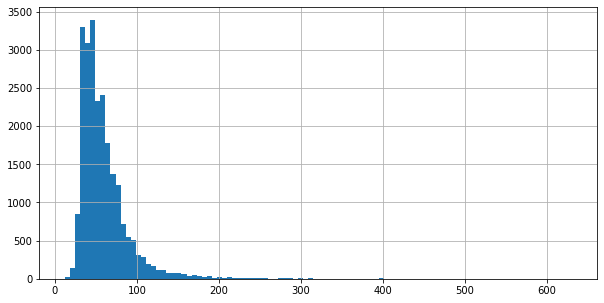

In [29]:
df['total_area'].hist(bins=100, figsize=(10,5))

<AxesSubplot:>

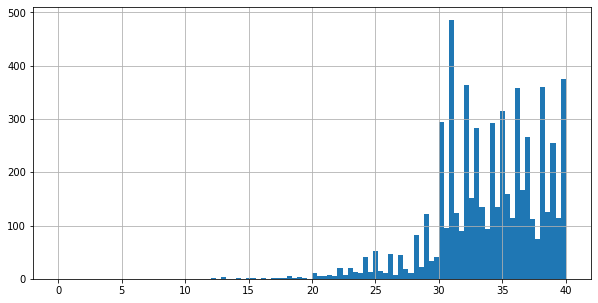

In [30]:
df['total_area'].hist(bins=100, figsize=(10,5), range=(0, 40))

<AxesSubplot:>

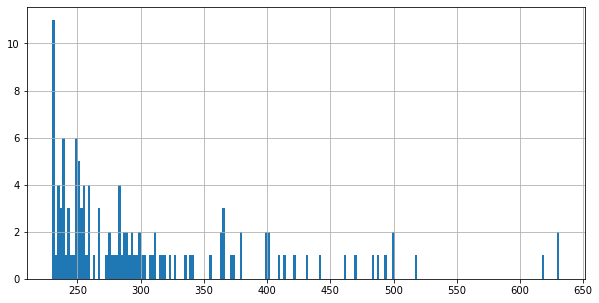

In [31]:
df['total_area'].hist(bins=200, figsize=(10,5), range=(230, 631.2))

In [32]:
df['total_area'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.8, 0.85, 0.95, 0.99, 0.999]).T

count    23614.000000
mean        59.852061
std         33.537725
min         12.000000
5%          31.000000
25%         40.000000
50%         52.000000
75%         69.475000
80%         74.500000
85%         81.300000
95%        115.000000
99%        187.000000
99.9%      367.322000
max        631.200000
Name: total_area, dtype: float64

In [33]:
df[(df['total_area']<25) | (df['total_area']>360)].total_area.count()/df['total_area'].count()

0.0092741593969679

Квартиры менее 25 кв. м. и более 360 являются редкостями, а составляют около одного процента

In [34]:
df = df[df['total_area']>=25]
df = df[df['total_area']<=300]

In [35]:
df['total_area'].describe()

count    23380.000000
mean        59.516235
std         29.842333
min         25.000000
25%         40.060000
50%         52.000000
75%         69.600000
max        300.000000
Name: total_area, dtype: float64

#### Жилая площадь и площадь кухни

In [36]:
df['living_area'].describe()

count    21526.000000
mean        34.005845
std         19.366549
min          2.000000
25%         18.700000
50%         30.000000
75%         42.200000
max        250.000000
Name: living_area, dtype: float64

In [37]:
df['living_area'].isna().sum()

1854

Заменить пропуски в данном случае не является возможным, ввиду отсутствия типовых размеров.

<AxesSubplot:>

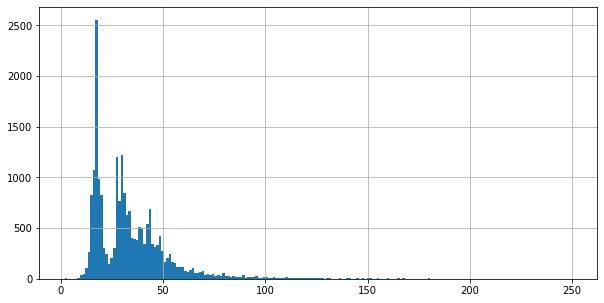

In [38]:
df['living_area'].hist(bins=200, figsize=(10,5))

In [39]:
df['kitchen_area'].describe()

count    21277.000000
mean        10.499004
std          5.651666
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [40]:
df['kitchen_area'].isna().sum()

2103

Заменить пропуски в данном случае не является возможным, ввиду отсутствия типовых размеров.

<AxesSubplot:>

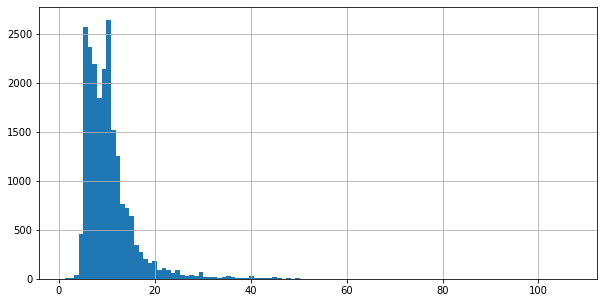

In [41]:
df['kitchen_area'].hist(bins=110, figsize=(10,5))

In [42]:
drop_index = df[(df['kitchen_area'] + df['living_area']) > df['total_area']].index
df.drop(drop_index, inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23320 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23320 non-null  int64  
 1   last_price            23320 non-null  float64
 2   total_area            23320 non-null  float64
 3   first_day_exposition  23320 non-null  object 
 4   rooms                 23320 non-null  int64  
 5   ceiling_height        23320 non-null  float64
 6   floors_total          23238 non-null  float64
 7   living_area           21466 non-null  float64
 8   floor                 23320 non-null  int64  
 9   is_apartment          2723 non-null   object 
 10  studio                23320 non-null  bool   
 11  open_plan             23320 non-null  bool   
 12  kitchen_area          21217 non-null  float64
 13  balcony               11988 non-null  float64
 14  locality_name         23271 non-null  object 
 15  airports_nearest   

#### Апартаменты и балконы

In [44]:
df['is_apartment'] = df['is_apartment'].fillna(value=False)
df['balcony'] = df['balcony'].fillna(value=0)

#### Населенный пункт

In [45]:
df.dropna(subset=['locality_name'], inplace=True)

In [46]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', '')
df['locality_name'] = df['locality_name'].str.replace('городской поселок','')

In [47]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', ' Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       ' Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', ' Лебяжье', ' Сиверский',
       'поселок Молодцово', ' Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       ' Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'деревня Оржицы',


In [50]:
df['locality_name']=df['locality_name'].astype('string')

Не были объединены населенные пункты с одинаковым названием, но с разными типами, так как это могут быть разные населенные пункты.

#### Приведение к змеиному регистру

In [51]:
df = df.rename(columns = {'cityCenters_nearest':'city_centers_nearest',
                         'parks_around3000':'parks_around_3000',
                         'ponds_around3000':'ponds_around_3000'
                         })

#### Изменение типа данных

In [52]:
df['floors_total'] = df['floors_total'].apply(pd.to_numeric)
df['balcony'] = df['balcony'].apply(pd.to_numeric)
df['balconu']=df['balcony'].astype('int')

#### Изменение формата времени

In [53]:
df['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### Всего этажей

In [54]:
df['floors_total'].describe()

count    23190.000000
mean        10.669254
std          6.580947
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [55]:
df.dropna(subset=['floors_total'], inplace=True)

<AxesSubplot:>

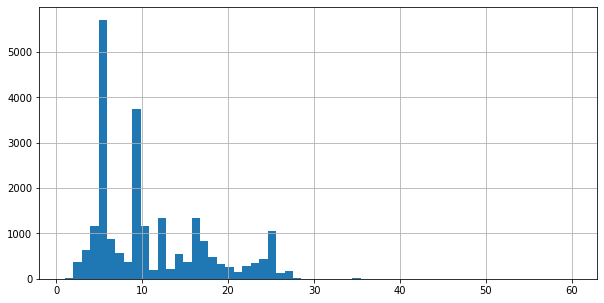

In [56]:
df['floors_total'].hist(bins=60, figsize = (10,5))

<AxesSubplot:>

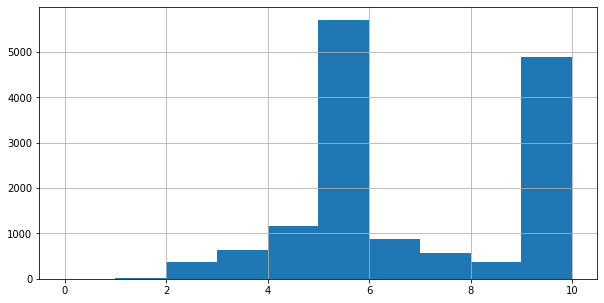

In [57]:
df['floors_total'].hist(bins=10, figsize = (10,5), range = (0,10))

<AxesSubplot:>

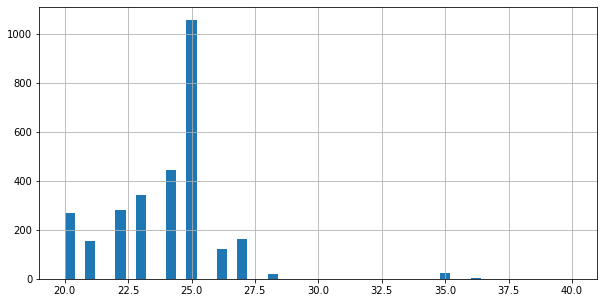

In [58]:
df['floors_total'].hist(bins=50, figsize = (10,5), range = (20,40))

In [59]:
df[(df['floors_total']<2) | (df['floors_total']>28)].floors_total.count()/df['floors_total'].count()

0.0024148339801638636

Менее одного процента составляют квартиры с высотностностью зданий менее 2 этажей и более 28 этажей

In [60]:
df = df[df['floors_total']>=2]
df = df[df['floors_total']<=28]

In [61]:
df['floors_total']=df.loc[:,['floors_total']].astype('int')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23134 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23134 non-null  int64         
 1   last_price            23134 non-null  float64       
 2   total_area            23134 non-null  float64       
 3   first_day_exposition  23134 non-null  datetime64[ns]
 4   rooms                 23134 non-null  int64         
 5   ceiling_height        23134 non-null  float64       
 6   floors_total          23134 non-null  int64         
 7   living_area           21321 non-null  float64       
 8   floor                 23134 non-null  int64         
 9   is_apartment          23134 non-null  bool          
 10  studio                23134 non-null  bool          
 11  open_plan             23134 non-null  bool          
 12  kitchen_area          21091 non-null  float64       
 13  balcony         

#### Сколько дней было размещено объявление

In [63]:
df['days_exposition'].describe()

count    20018.000000
mean       180.875562
std        219.579743
min          1.000000
25%         45.000000
50%         96.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [64]:
df['days_exposition'].isna().sum()

3116

<AxesSubplot:>

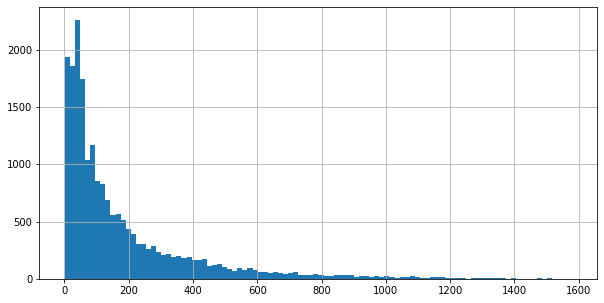

In [65]:
df['days_exposition'].hist(bins=100, figsize = (10,5))

In [66]:
df[df['days_exposition']>1100].days_exposition.count()/df['days_exposition'].count()

0.007992806474173244

In [67]:
drop_index = df[df['days_exposition']>1100].index
df.drop(drop_index, inplace=True)

In [68]:
df['days_exposition']=df.loc[:,['days_exposition']].astype('int64', errors='ignore')

#### Проверка потери данных

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22974 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22974 non-null  int64         
 1   last_price            22974 non-null  float64       
 2   total_area            22974 non-null  float64       
 3   first_day_exposition  22974 non-null  datetime64[ns]
 4   rooms                 22974 non-null  int64         
 5   ceiling_height        22974 non-null  float64       
 6   floors_total          22974 non-null  int64         
 7   living_area           21172 non-null  float64       
 8   floor                 22974 non-null  int64         
 9   is_apartment          22974 non-null  bool          
 10  studio                22974 non-null  bool          
 11  open_plan             22974 non-null  bool          
 12  kitchen_area          20939 non-null  float64       
 13  balcony         

In [70]:
(len(data)-len(df))/len(data)

0.030592008101607664

В ходе фильтрации было потеряно 3% изначального массива, что является оптимальной потерей записей.

#### Вывод

- Исправлены высоты потолков;
- Заменены неопределенные значения в столбце обозначения апартаментов и столбце количества балконов;
- Исправлены неявные дубликаты населенных пунктов;
- Названия столбцов изменены к змеиному регистру;
- Изменены типы данных.

Обнаружены пропуски в данных, собранных автоматической системой. Такие данные могли появится при несоответствии адреса, заявленного пользователем, ввиду несоответствия формата вносимых данных формату хранения адресов в БД. Также часть данных не вносилась. Следует переработать форму подачи объявления путем контроля вводимых данных.

### Посчитайте и добавьте в таблицу новые столбцы

**Цена квадратного метра**

In [81]:
df['price_for_meter']=df['last_price']/df['total_area']

**Дата**

In [82]:
df['day_publ'] = df['first_day_exposition'].dt.weekday
df['month_publ'] = df['first_day_exposition'].dt.month
df['year_publ'] = df['first_day_exposition'].dt.year

**Группировка этажей**

In [83]:
def floor_typer(x):
    if x['floor'] == 1:
        return 'Первый'
    elif x['floor'] == x['floors_total']:
        return 'Последний'
    else:
        return  'Другой'


In [84]:
df['floor_type'] = df.apply(floor_typer, axis = 1)
df['floor_type'].head()

0    Другой
1    Первый
2    Другой
3    Другой
4    Другой
Name: floor_type, dtype: object

In [85]:
#поиск строк, где тип этажа последний, а номер - 1
df.query("floor_type == 'Последний' & floor == 1")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,balconu,price_for_meter,day_publ,month_publ,year_publ,floor_type


In [86]:
#минимальный этаж
df['floors_total'].min()

2

In [87]:
#определить тип этажа
df['floor_type'].dtypes

dtype('O')

In [88]:
#сменить тип на строку
df['floor_type']=df['floor_type'].astype('string')

In [89]:
df['floor_type']

0        Другой
1        Первый
2        Другой
3        Другой
4        Другой
          ...  
23694    Другой
23695    Другой
23696    Первый
23697    Другой
23698    Первый
Name: floor_type, Length: 22974, dtype: string

**Округление расстояния до центра**

In [90]:
df['centers_km'] = (df['city_centers_nearest']/1000).round()
df['centers_km'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: centers_km, dtype: float64

- Посчитана цена одного квадратного метра для каждой квартиры;
- Разбиты даты подачи объявлений для определения дат подачи объявлений;
- Добавлены типы этажей для оценки стоимости квартиры в зависимости от ее расположения в доме;
- Расстояния до центра переведены в километры и округлены.

В последующем такие параметры, как расстояние до аэропорта и центра города стоит собирать в километрах для удобства пользователя и анализа.

### Проведите исследовательский анализ данных

#### Площадь

In [91]:
df['total_area'].describe()

count    22974.000000
mean        59.354001
std         29.693368
min         25.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        300.000000
Name: total_area, dtype: float64

Text(0, 0.5, 'Количество объявлений')

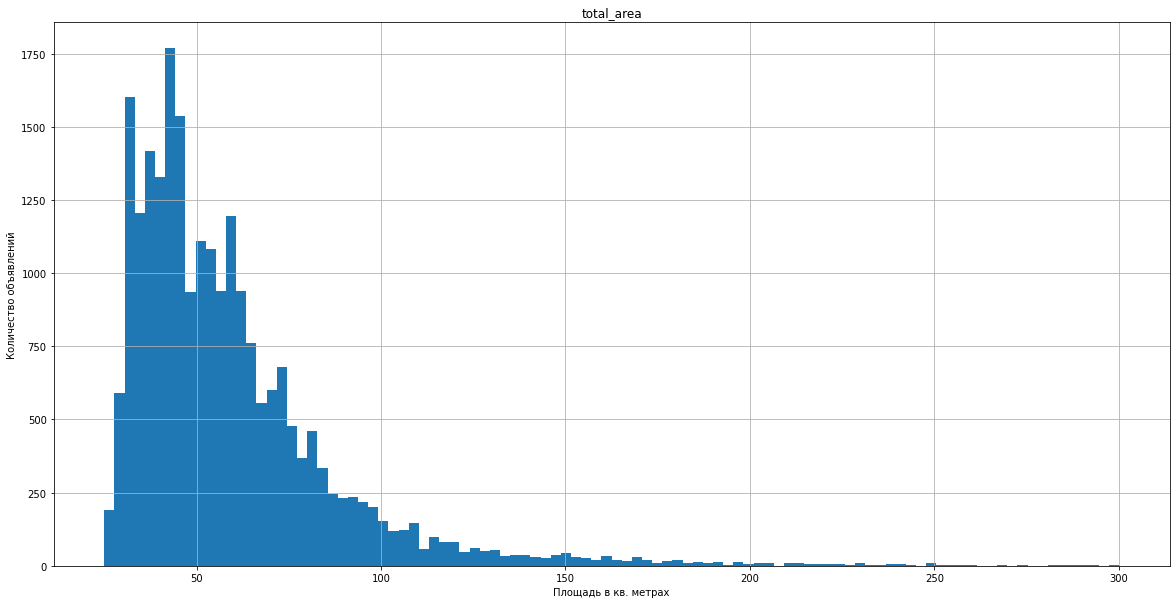

In [92]:
df.hist('total_area', bins=100, figsize=(20,10))
plt.xlabel('Площадь в кв. метрах')
plt.ylabel('Количество объявлений')

In [93]:
df['total_area'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.8, 0.85, 0.9, 0.95, 0.99]).T

count    22974.000000
mean        59.354001
std         29.693368
min         25.000000
5%          31.000000
25%         40.000000
50%         52.000000
75%         69.000000
80%         74.100000
85%         81.000000
90%         92.200000
95%        113.200000
99%        178.027000
max        300.000000
Name: total_area, dtype: float64

Основной объем данных занимает недвижимость до 100 квадратных метров. Площади больше занимают меньшую часть:

In [94]:
len(df[df['total_area']>113])/len(df['total_area'])

0.05018716810307304

Наличие таких площадей может объясниться тем, что недвижимость является элитной.

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

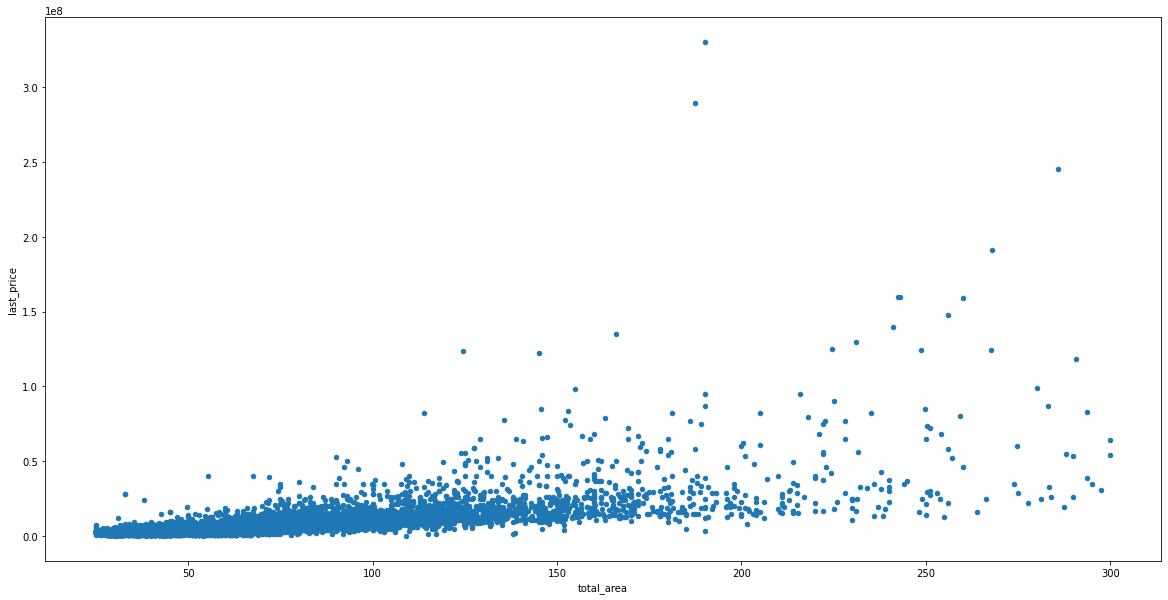

In [95]:
df.plot.scatter(x='total_area', y='last_price', figsize=(20,10))

Как мы видим, цена на такую недвижимость возрастает с увеличением площади

#### Жилая площадь

Text(0, 0.5, 'Количество объявлений')

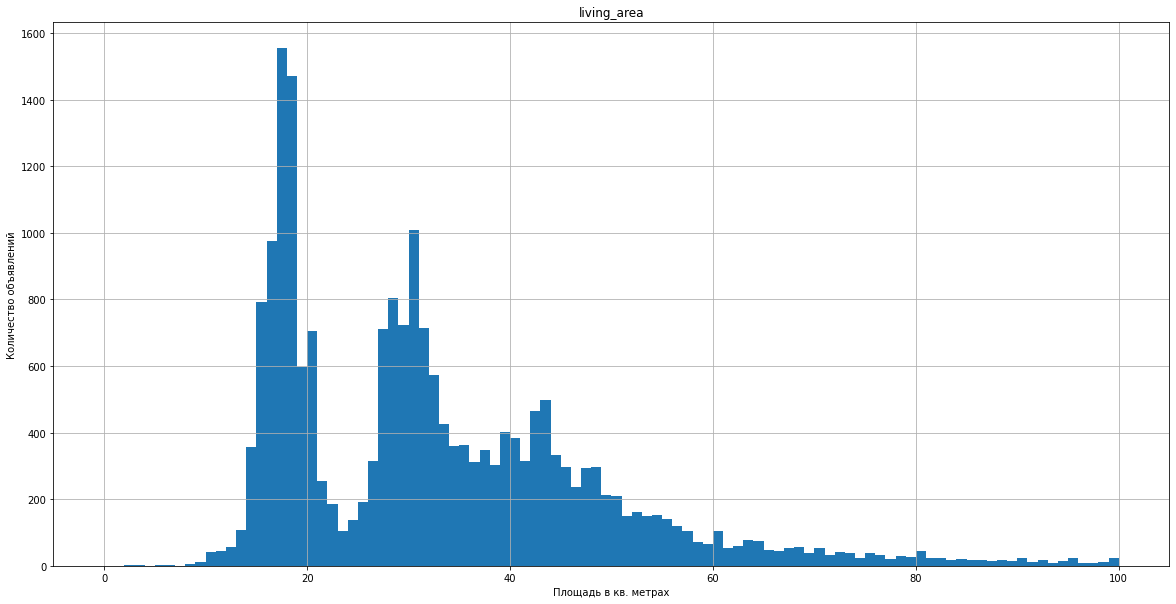

In [96]:
df.hist('living_area', bins=100, range=(0,100),figsize=(20,10))
plt.xlabel('Площадь в кв. метрах')
plt.ylabel('Количество объявлений')

Наблюдаются выбросы от 15 до 20 квадратных метров и на 30 квадратных метрах. Такие выбросы могут быть связаны с количеством комнат и стандартизированными планировками квартир. По той же причине наблюдается резкий спад между этими промежутками.

#### Площадь кухни

Text(0, 0.5, 'Количество объявлений')

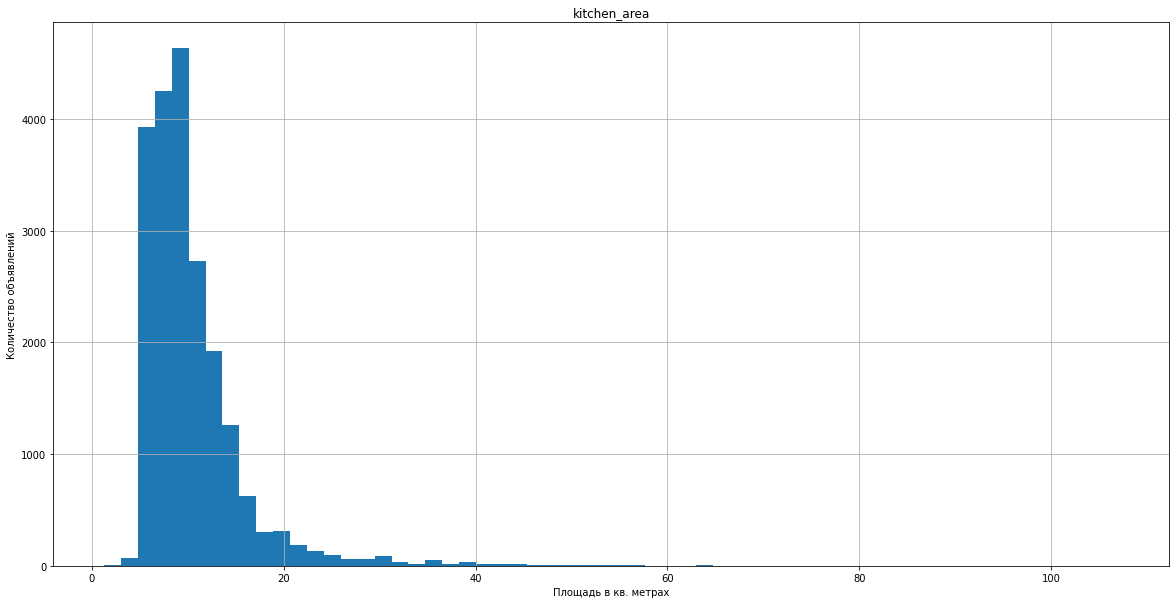

In [97]:
df.hist('kitchen_area', bins=60, figsize=(20,10))
plt.xlabel('Площадь в кв. метрах')
plt.ylabel('Количество объявлений')

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

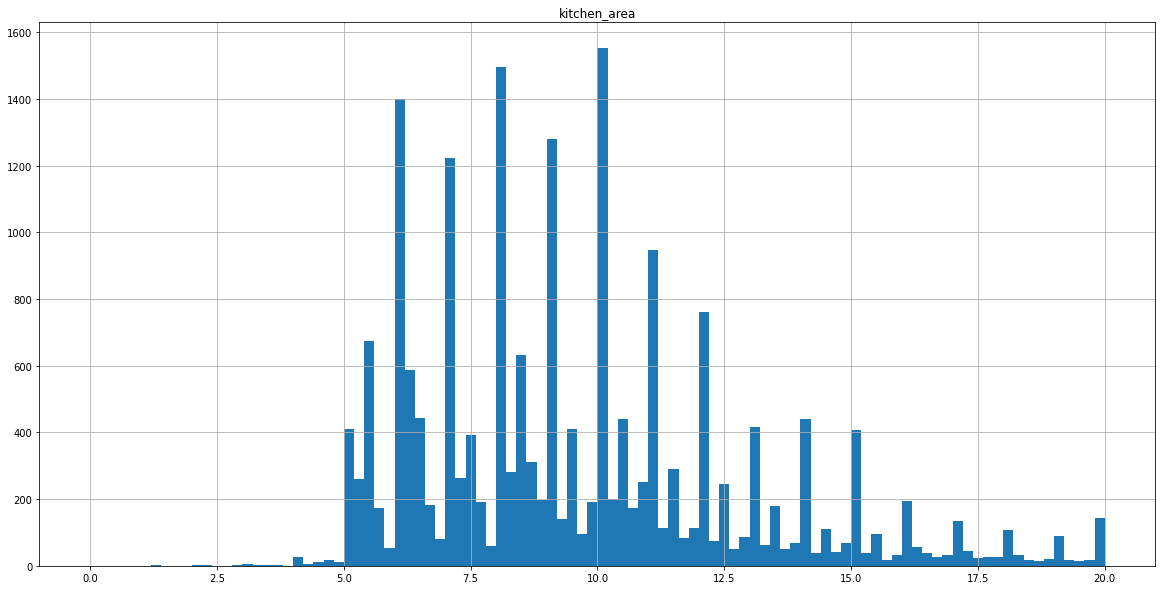

In [98]:
df.hist('kitchen_area', bins=100, figsize=(20,10), range = (0, 20))

На гистограмме не обнаружено аномальных значений. 

#### Цена объекта

Text(0, 0.5, 'Количество объявлений')

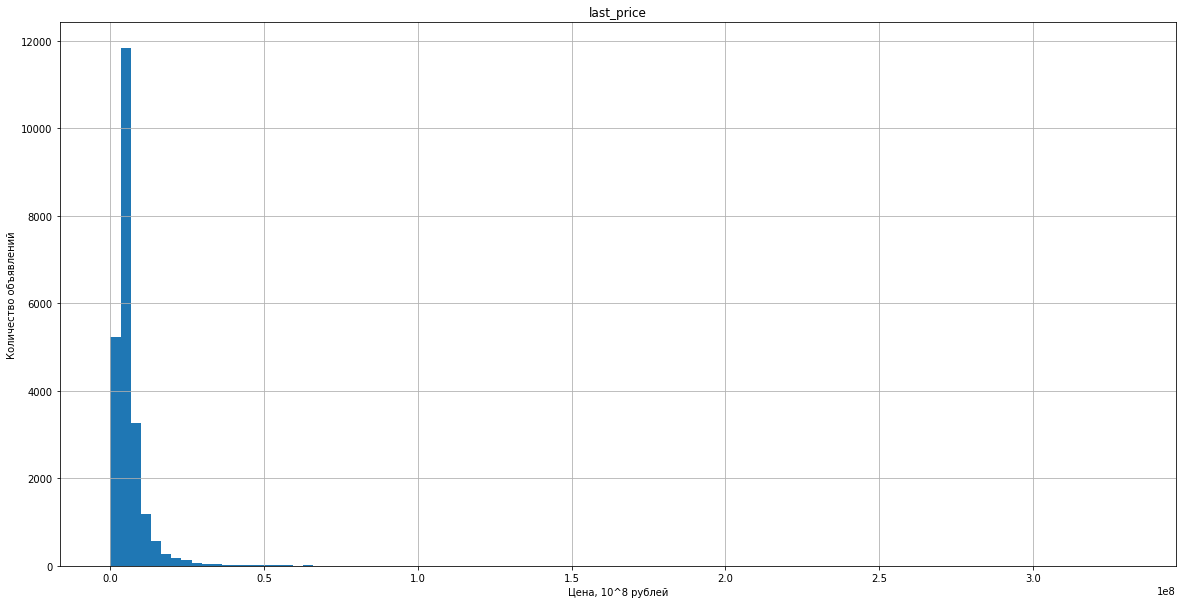

In [99]:
df.hist('last_price', bins=100, figsize=(20,10))
plt.xlabel('Цена, 10^8 рублей')
plt.ylabel('Количество объявлений')

Text(0, 0.5, 'Количество объявлений')

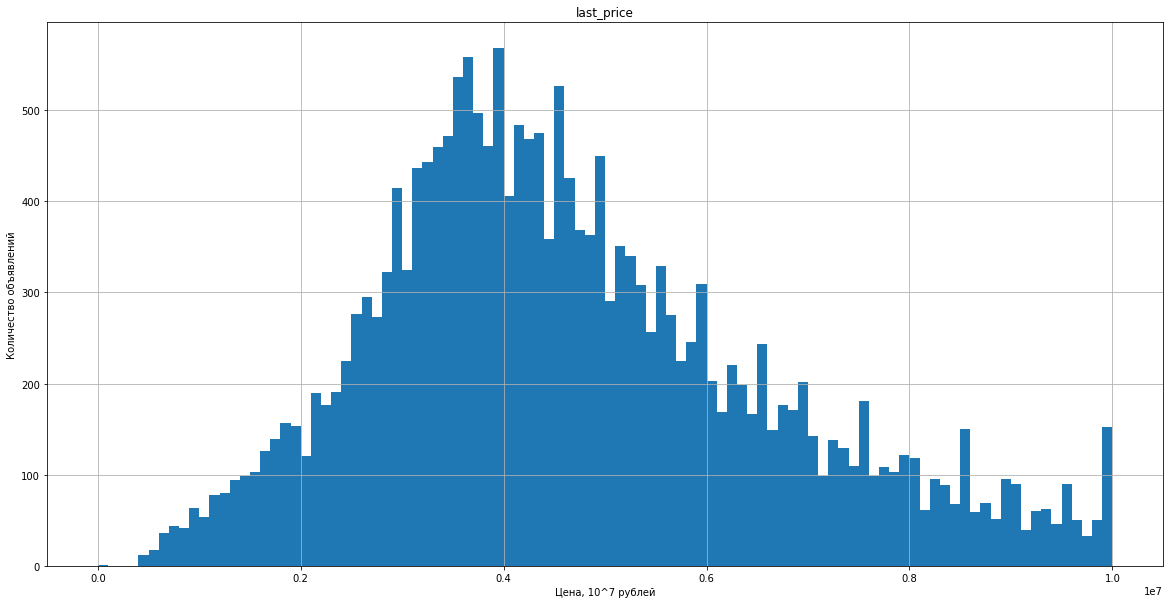

In [100]:
df.hist('last_price', bins=100, range=(0,10000000), figsize=(20,10))
plt.xlabel('Цена, 10^7 рублей')
plt.ylabel('Количество объявлений')

In [101]:
df['last_price'].describe(percentiles=[0.05, 0.075, 0.1, 0.15, 1/4, 1/2, 3/4, 0.8, 0.85, 0.9, 0.95, 0.99]).T

count    2.297400e+04
mean     6.269399e+06
std      7.616724e+06
min      1.219000e+04
5%       1.900000e+06
7.5%     2.250000e+06
10%      2.500000e+06
15%      2.900000e+06
25%      3.450000e+06
50%      4.640000e+06
75%      6.700000e+06
80%      7.500000e+06
85%      8.600000e+06
90%      1.070000e+07
95%      1.489298e+07
99%      3.202700e+07
max      3.300000e+08
Name: last_price, dtype: float64

Основной рынок приходится на цену от 2 до 8 млн. рублей

#### Количество комнат

Text(0, 0.5, 'Количество объявлений')

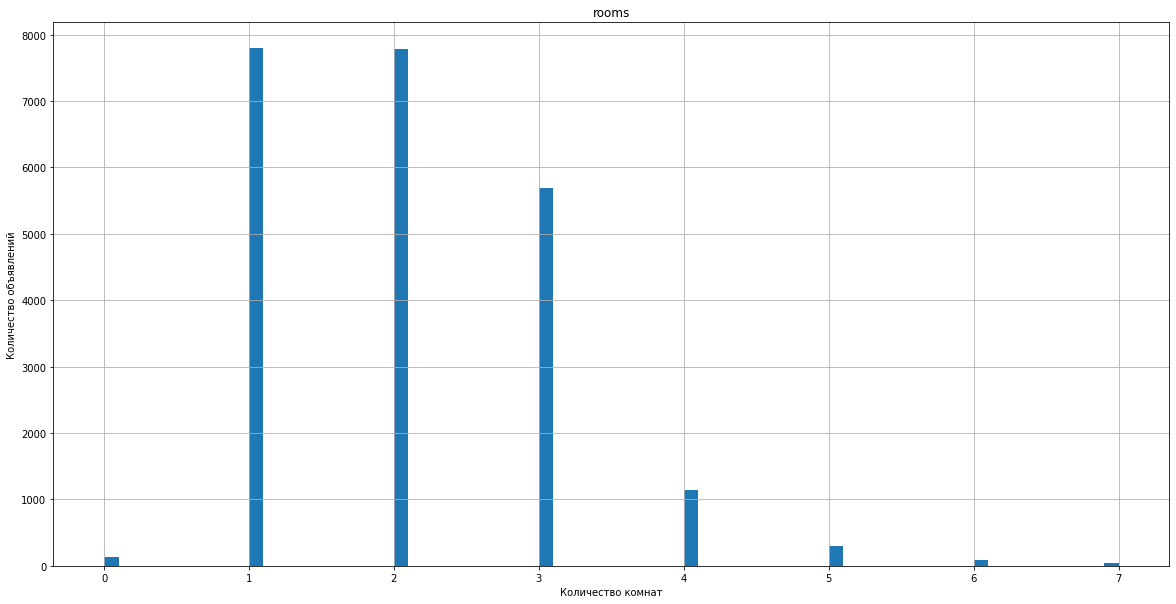

In [102]:
df.hist('rooms', bins=70, figsize=(20,10))
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')

In [103]:
df['ceiling_height'].describe()

count    22974.000000
mean         2.691749
std          0.201799
min          2.250000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

На рынке в основном распространены квартиры с конфигурацией из одной, двух и трех комнат

#### Высота потолков

Text(0, 0.5, 'Количество объявлений')

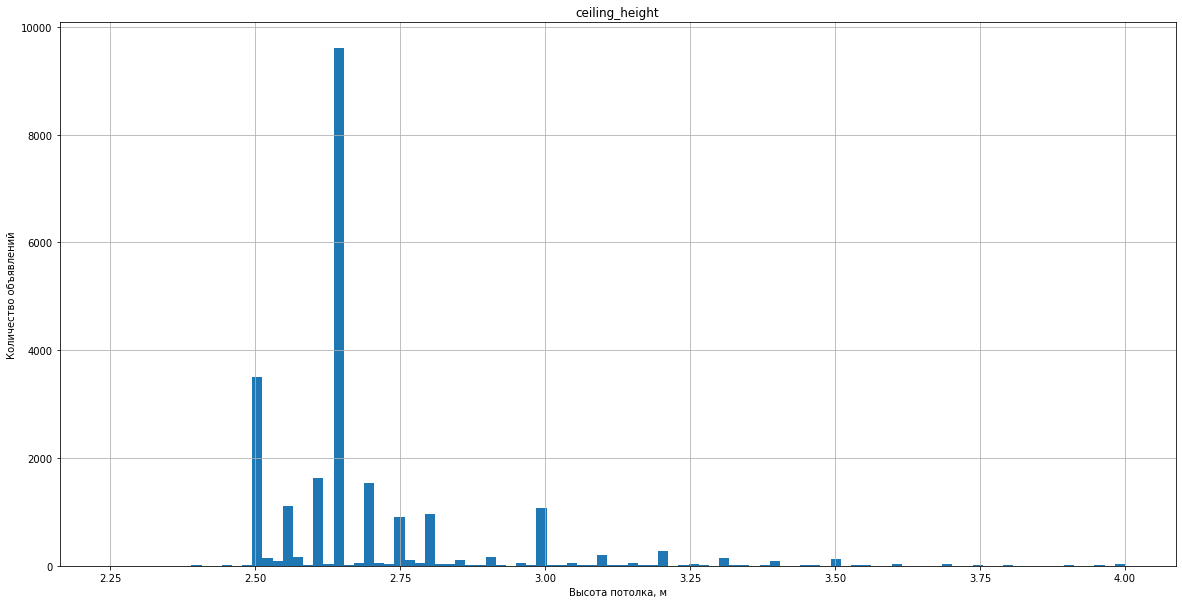

In [104]:
df.hist('ceiling_height', bins=100, figsize=(20,10))
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество объявлений')

Text(0, 0.5, 'Количество объявлений')

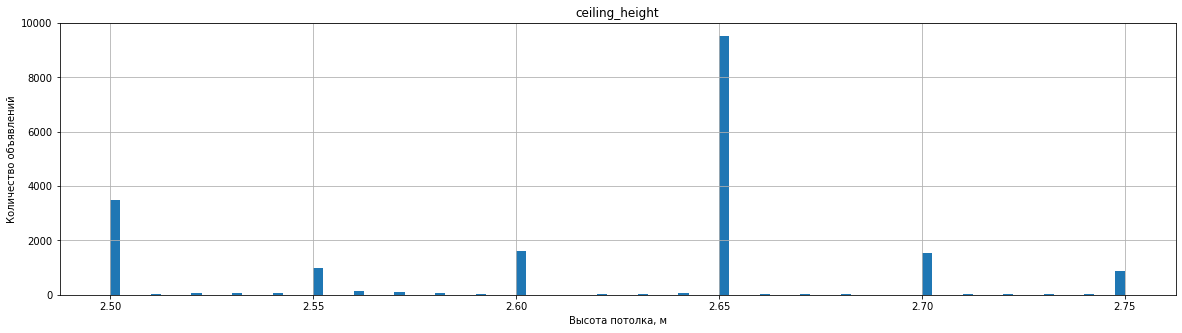

In [105]:
df.hist('ceiling_height', bins=100, figsize=(20,5), range=(2.5, 2.75))
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество объявлений')

В основном преобладают потолки высотой 2,5 и 2,65 метра.

#### Этаж квартиры

Text(0, 0.5, 'Количество объявлений')

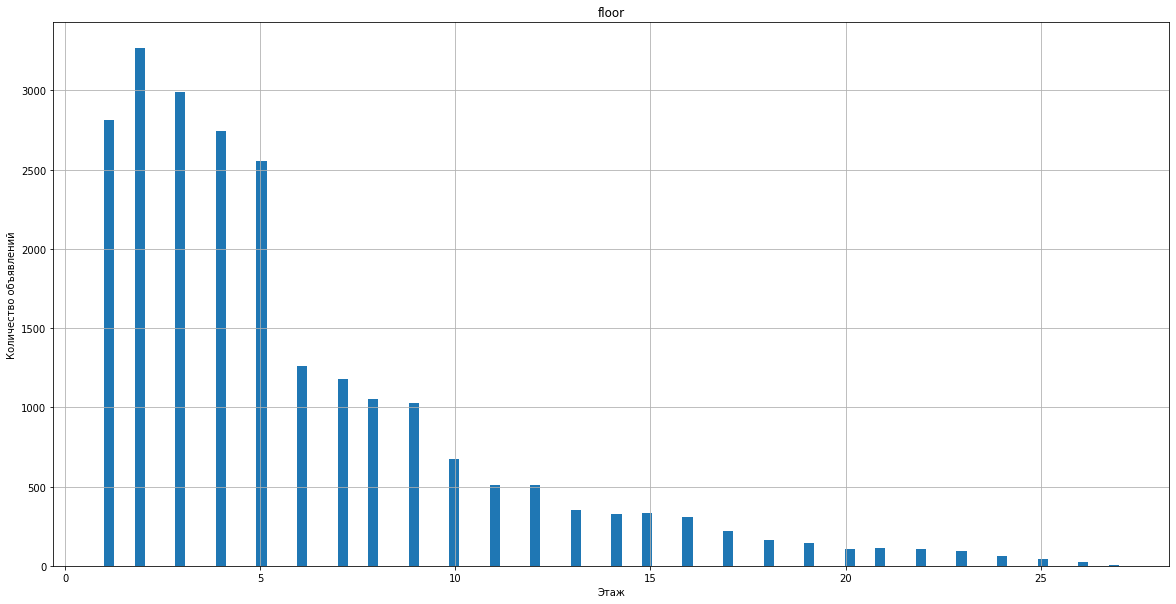

In [106]:
df.hist('floor', bins=100, figsize=(20,10))
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')

Text(0, 0.5, 'Количество объявлений')

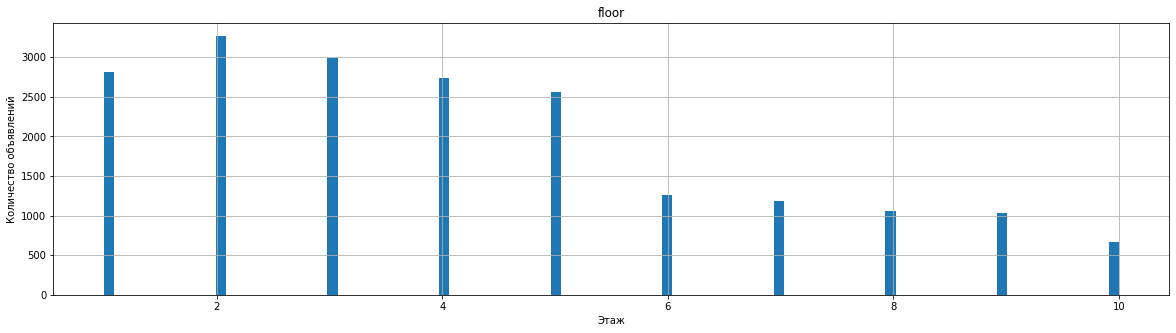

In [107]:
df.hist('floor', bins=100, figsize=(20,5), range=(1,10))
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')

Основной рынок представляют квартиры, находящиеся по 5й этаж, что может быть связано с низкоэnажной застройкой.

#### Тип этажа квартиры

In [108]:
hist_floor_type = df.pivot_table(index='floor_type', values='last_price', aggfunc=['count']).droplevel(level=1, axis=1)
hist_floor_type

,count
floor_type,
Другой,16930
Первый,2812
Последний,3232


<AxesSubplot:xlabel='floor_type', ylabel='count'>

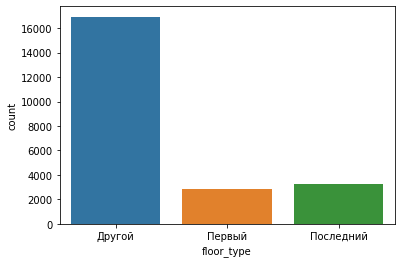

In [109]:
sns.barplot(data = hist_floor_type, x = hist_floor_type.index, y = 'count')

Преобладает количество квартир типа `Другой`, так как в одном доме может быть только один первый и один последний этаж.

#### Общее количество этажей

Text(0, 0.5, 'Количество объявлений')

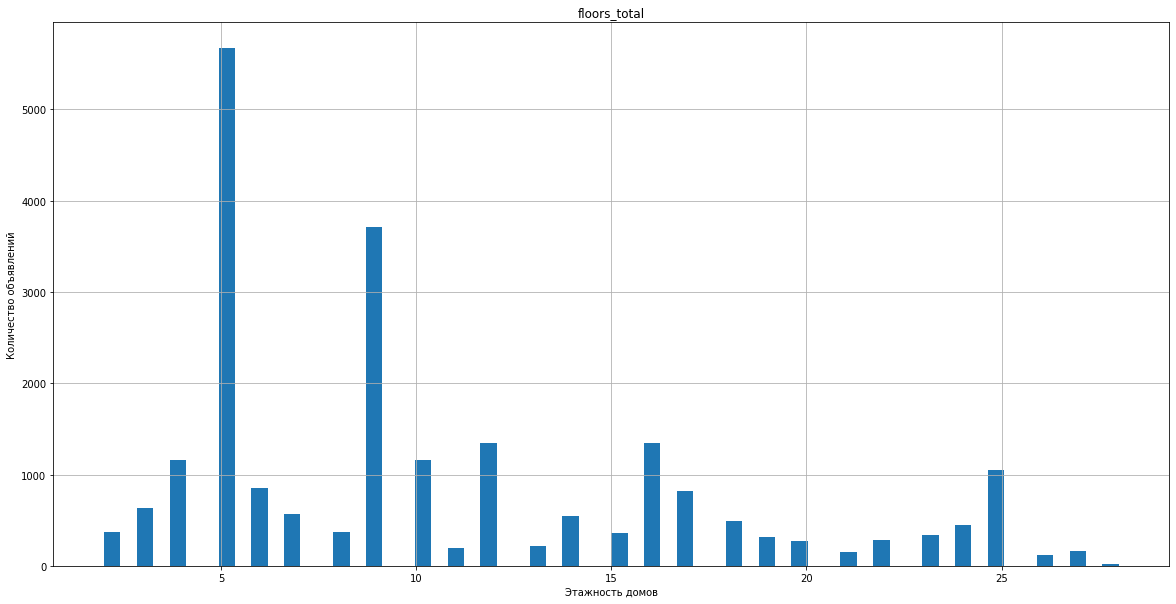

In [110]:
df.hist('floors_total', bins=62, figsize=(20,10))
plt.xlabel('Этажность домов')
plt.ylabel('Количество объявлений')

Основную часть объявлений представляют здания от 5 до 10 этажей

Text(0, 0.5, 'Количество объявлений')

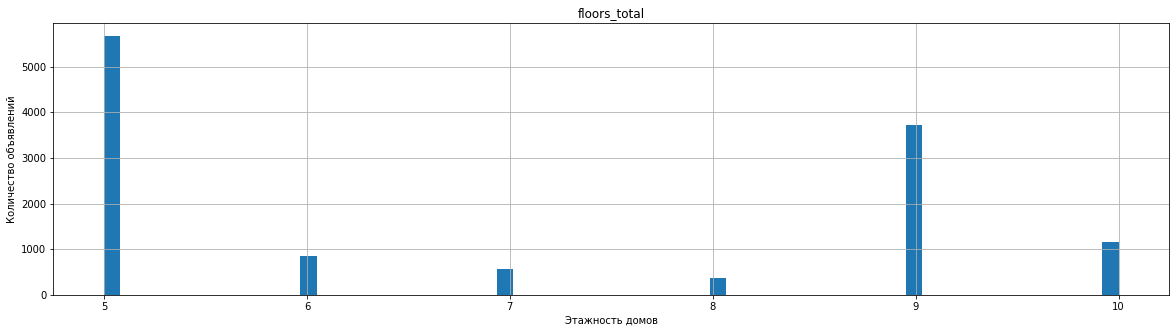

In [111]:
df.hist('floors_total', bins=62, figsize=(20,5), range=(5, 10))
plt.xlabel('Этажность домов')
plt.ylabel('Количество объявлений')

В базе данных преобладают пяти- и девятиэтажные дома, так как раньше дома такой конфигурации являлись типовой застройкой.

#### Расстояние до центра города

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

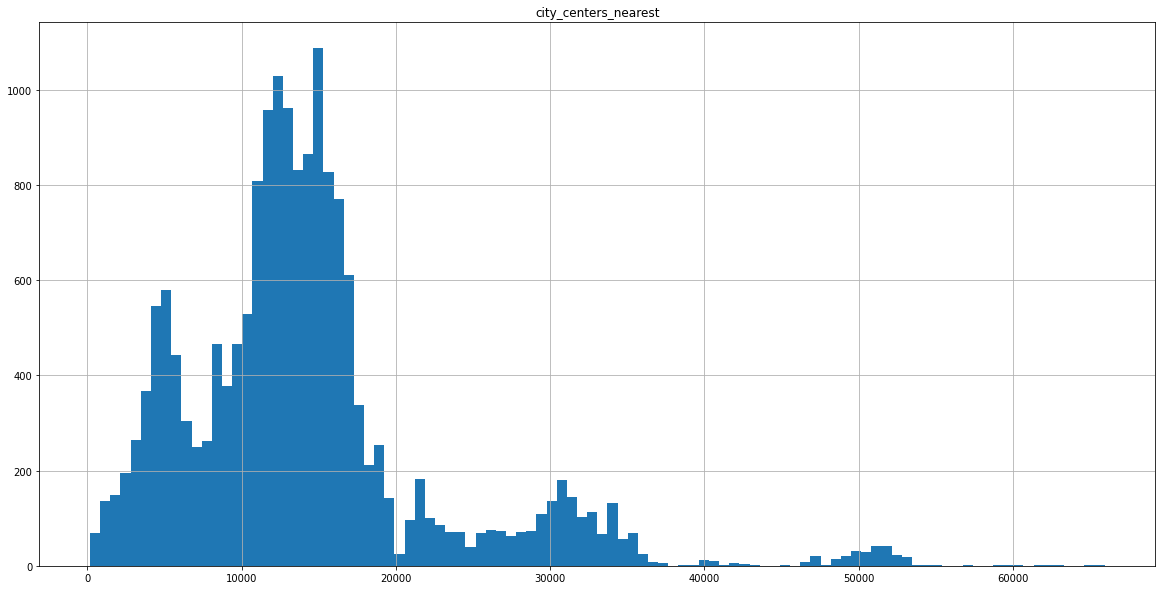

In [112]:
df.hist('city_centers_nearest', bins=100, figsize=(20,10))

Видны всплески данных в районе 5 км от центра и от 10 до 17 км от центра, что может говорить об отдалении спальных районов от центра в различных населенных пунктах. Для примера рассмотрим Санкт-Петербург.

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

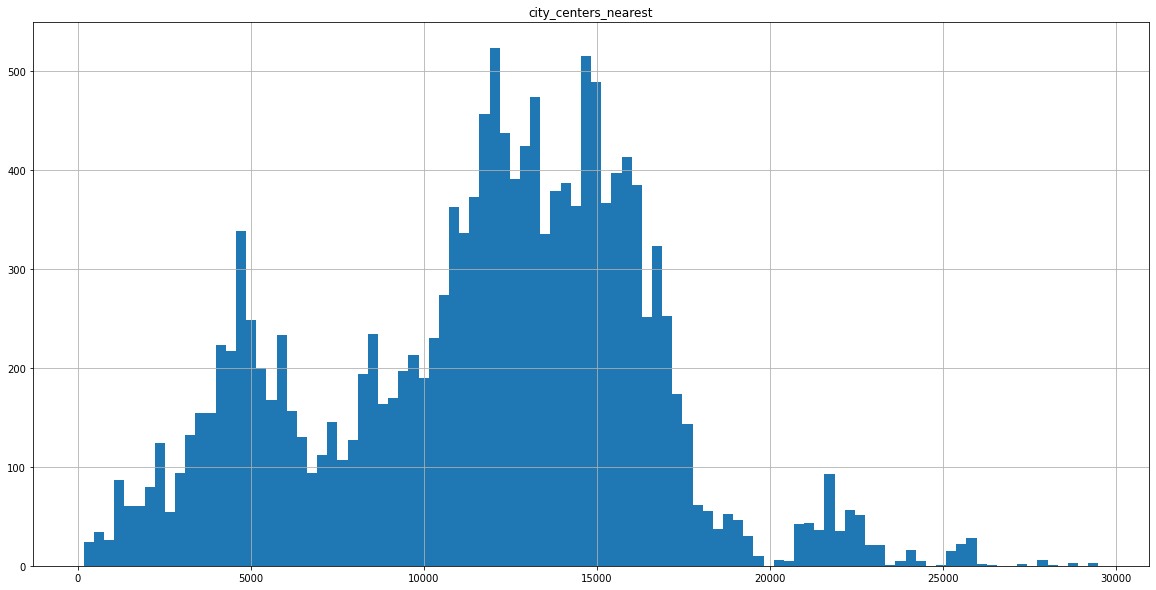

In [113]:
df[df['locality_name']=='Санкт-Петербург'].hist('city_centers_nearest', bins=100, figsize=(20,10))

Как видно из гистограммы, преобладают объявления в удалении 4-5 км и 12-16 км от центра города.
- 4-5 км: причиной массовой продажи квартир в центре может послужить желание собственников к переезду в другой район с меньшими ценами на недвижимость, но с теми же условиями проживания;
- 12-16 км: массовая продажа квартир в данном радиусе может говорить о том, что на таком отдалении находятся спальные районы типовой застройки. Проверим данную гипотезу.

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

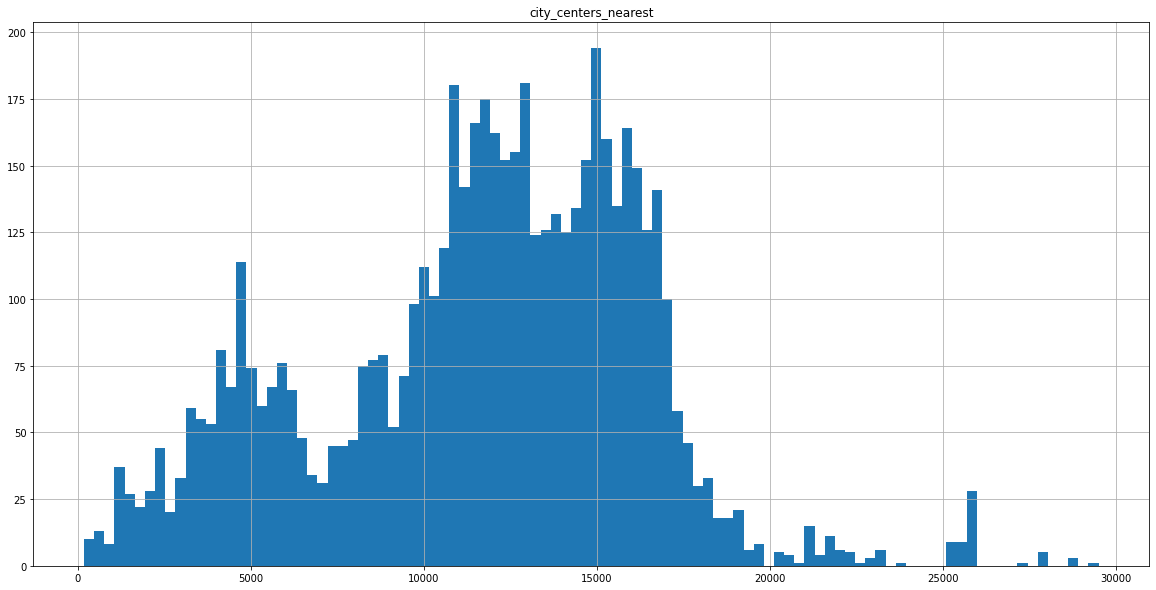

In [114]:
df[(
    (df['locality_name']=='Санкт-Петербург') &
    ((df['floors_total']==5) | (df['floors_total']==9))
   )
  ].hist('city_centers_nearest', bins=100, figsize=(20,10))

Преобладание пятиэтажных домов в центре является типичным случаем. В то же время в радиусе 12-16 км преобладают именно пяти- и девятиэтажные дома, что подтверждает гипотезу о типовой застройке спальных районов.

#### Расстояние до ближайшего аэропорта

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

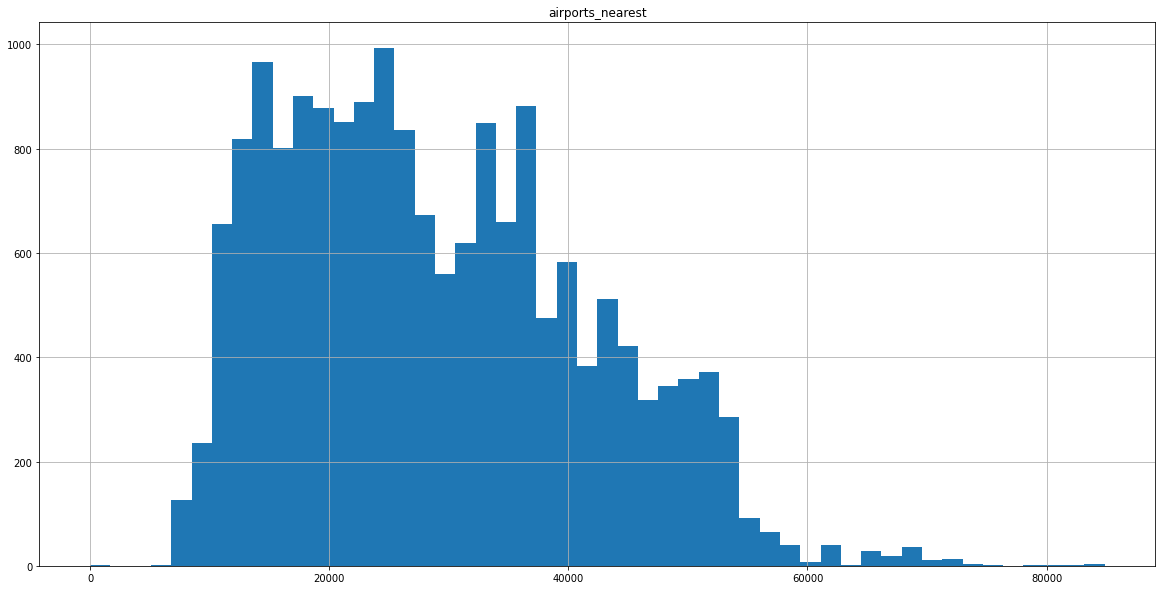

In [115]:
df.hist('airports_nearest', bins=50, figsize=(20,10))

Как мы видим, расстояние до аэропорта имеет нормальное распределение. Объявления, в которых расстояние до аэропорта является минимальным говорит о наличии населенных пунктов близ аэропорта. В остальном наблюдается отдаленность не менее 10 км.

In [116]:
df[df['airports_nearest'] < 10000]['locality_name'].unique()

<StringArray>
['Санкт-Петербург', 'поселок Шушары']
Length: 2, dtype: string

Исходя из информации, полученной через карты, наиболее приблеженными к аэропорту, населенными пунктами являются Санкт-Петербург (Московский районе) и Шушары.

#### Расстояние до ближайшего парка

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

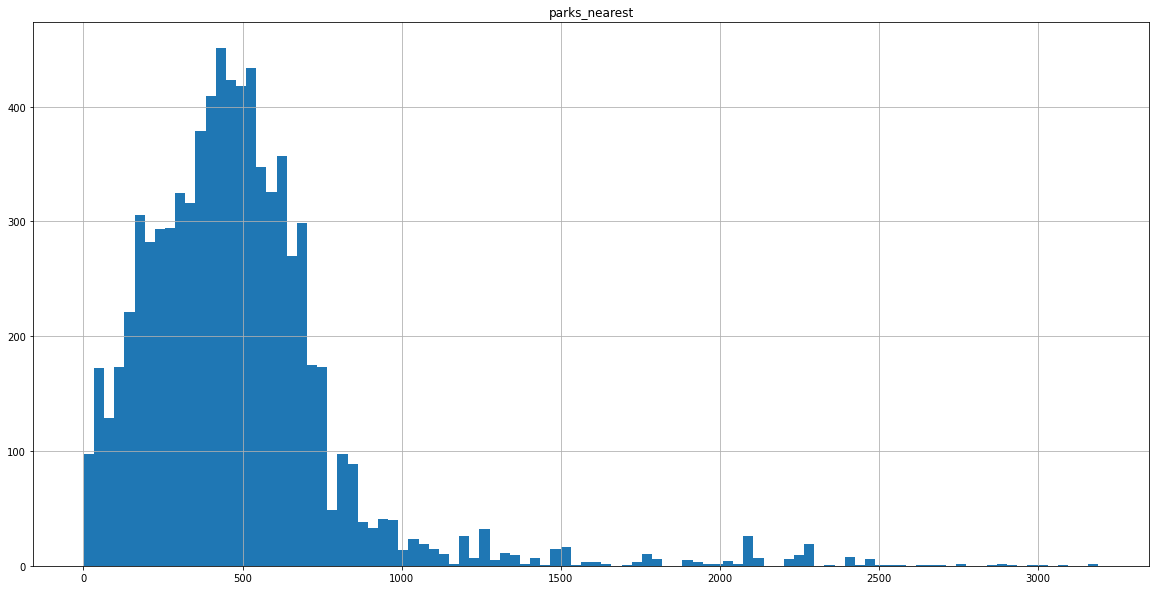

In [117]:
df.hist('parks_nearest', bins=100, figsize=(20,10))

Распределение является нормальным. В основном преобладает недвижимость не более 700 метров от парка

#### День и месяц публикации

array([[<AxesSubplot:title={'center':'day_publ'}>]], dtype=object)

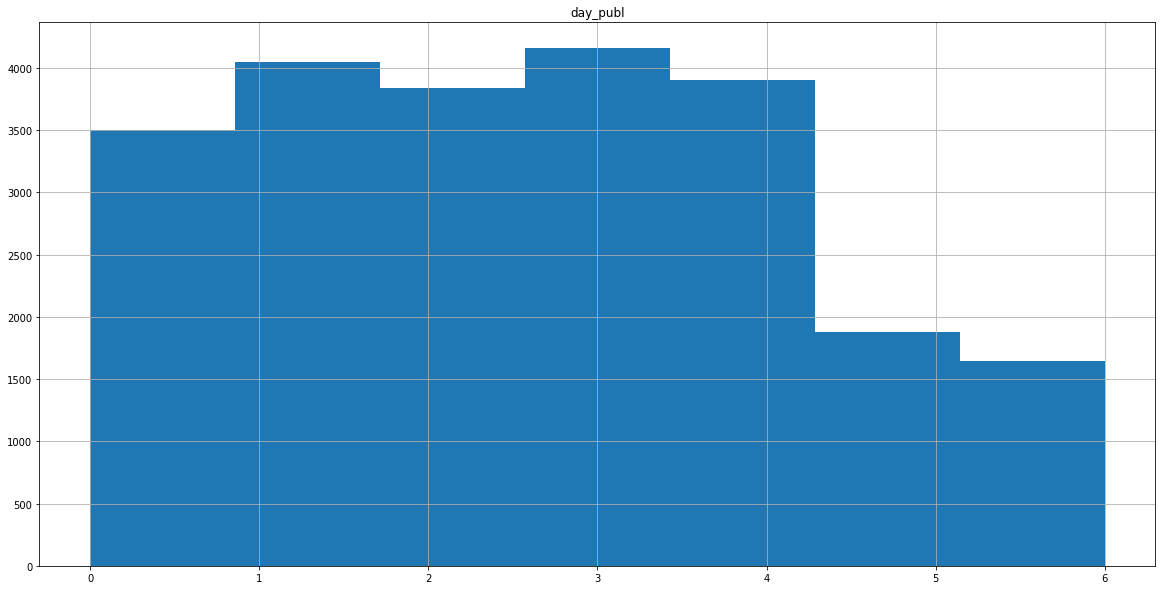

In [118]:
df.hist('day_publ', bins=7, figsize=(20,10))

В основном объявления публикуются в течение рабочей недели, что может быть связано с работой риелторских фирм.

array([[<AxesSubplot:title={'center':'month_publ'}>]], dtype=object)

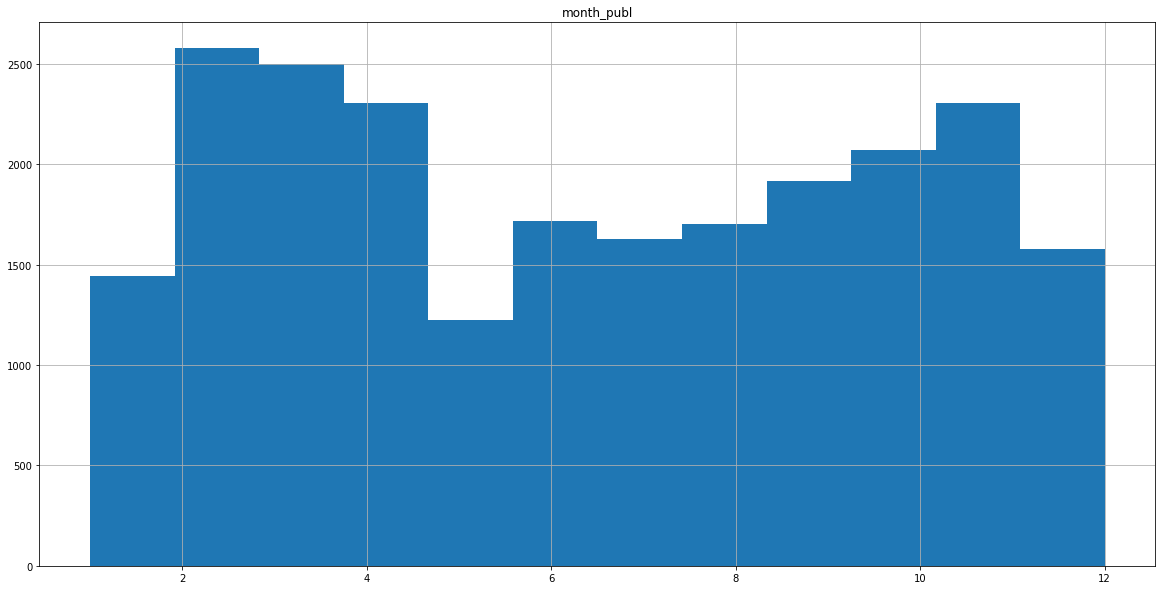

In [119]:
df.hist('month_publ', bins=12, figsize=(20,10))

Наименьшее количество объявлений приходится на предпраздничные и праздничные периоды: январь, май и декабрь. В летний период количество объявлений является средним

#### Вывод

Исследовано распределение параметров в массиве данных.

- **Площадь квартиры**. Среди всех объявлений, наибольшая часть приходится на квартиры площадью до 100 квадратных метров;
- **Жилая площадь**. Основной объем данных приходится на квартиры жилой площадью 15-20 и 30 квадратных метров, что связано со стандартизированными планировками квартир;
- **Площадь кухни**. В датасете отсутствуют выбросы значений площади кухни. В большинстве объявлений площадь кухни составлет от 5 до 11 квадратных метров;
- **Цена объекта**. В большинстве размещенных объявлений цена объекта недвижимости составляет от 2 до 8 млн. рублей;
- **Количество комнат**. Большинство объявлений представляют собой квартиры от одно до трех комнат;
- **Высота потолков**. В массиве данных наиболее распространены объявления с высотой потолков 2,5 и 2,65 метра;
- **Этаж квартиры**. В подавляющей части объявлений квартиры располагаются до 9 этажа, в частности большинство из них до 5, что связано с низкоуровневой застройкой;
- **Тип этажа квартиры**. В более чем 75% случаев квартиры находятся ни на первом, ни на последнем этажах;
- **Общее количество этажей**. В базе данных преобладают пяти- и девятиэтажные дома, ввиду топивой застройки спальных районов;
- **Расстояние до центра города**. Обнаружено, что в основная часть недвижимости из объявлений расположена на радиусах 5 и 10-16 км, что говорит о расположении спальных районов в основном населенном пункте - Санкт-Петербурге;
- **Расстояние до ближайшего аэропорта**. Не обнаружено аномальных значений. Минимальная отдаленности большинства квартир начинается от 10 км;
- **Расстояние до ближайшего парка**. В большинстве случаев расстояние до парка не превышает 700 метров;
- **День и месяц публикации**. Обнаружена зависимость количества поданных объявлений от дата дня и месяца подачи. Так наименьшее число заявлений приходится на выходные и на предпраздничные и праздничные периоды (январь, май и декабрь). В летнее время динамика является средней.

### Изучение времени продажи квартир

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

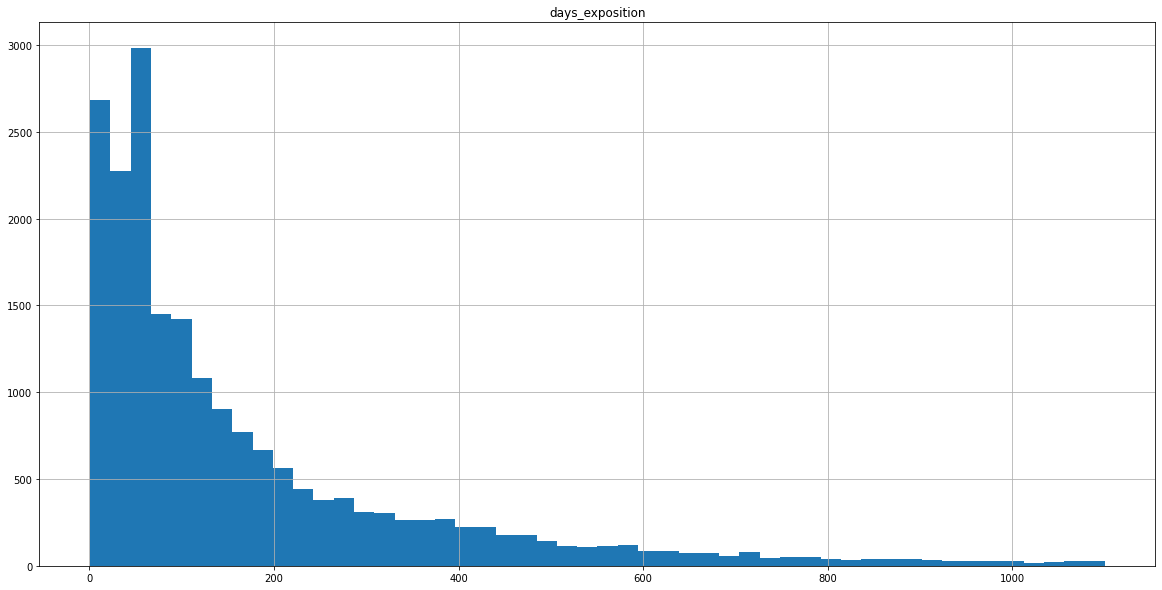

In [120]:
df.hist('days_exposition', bins=50, figsize=(20,10))

In [121]:
print('Среднее', df['days_exposition'].mean(),'\n',
     'Медиана', df['days_exposition'].median())

Среднее 172.26130526739854 
 Медиана 94.0


В среднем квартиры продаются до полугода, но большинство квартир продается в течение трех месяцев. Такой разрыв связан с тем, что в датасете присутствуют объявления, чью продолжительность размещения достигает до 4х лет. Рассмотрим подробнее промежуток до 180 дней.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

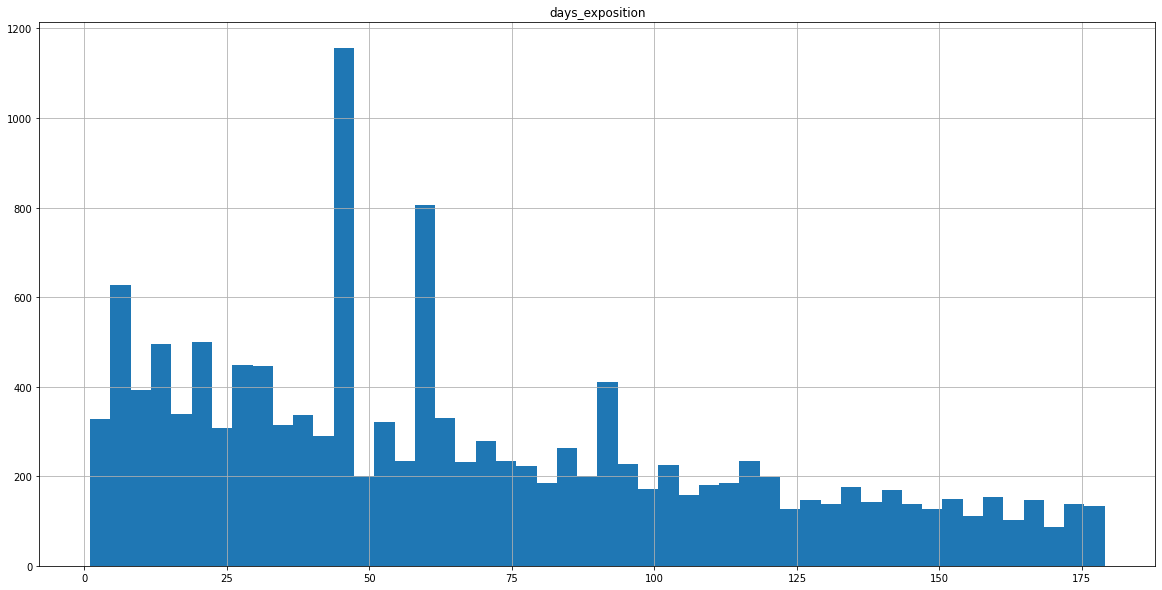

In [122]:
df[df['days_exposition']<=180].hist('days_exposition', bins=50, figsize=(20,10))

Данные распределены равномерно, за исключением пиков.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

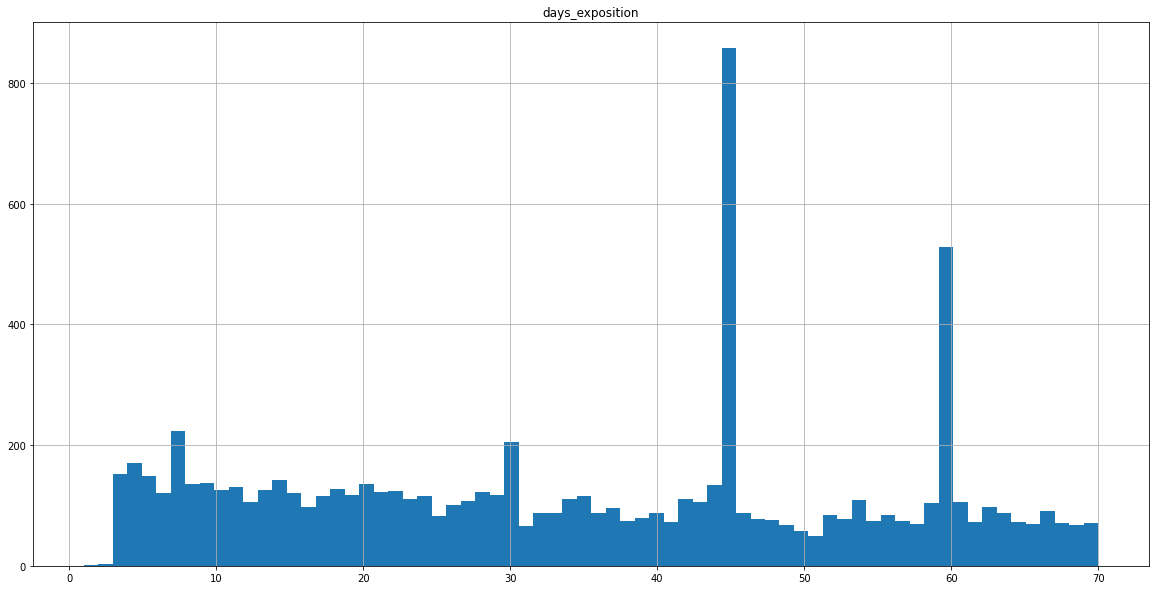

In [123]:
df[df['days_exposition']<=70].hist('days_exposition', bins=70, figsize=(20,10))

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

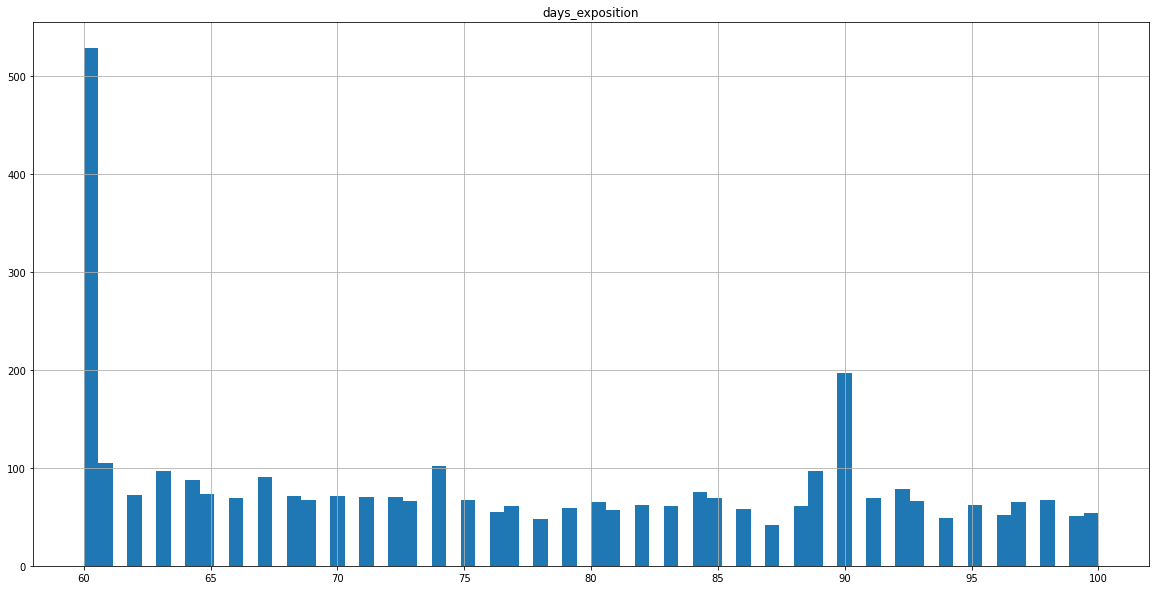

In [124]:
df[((df['days_exposition']<=100) & (df['days_exposition']>=60))].hist('days_exposition', bins=70, figsize=(20,10))

Пики наблюдаются на:
- 7 день - Неделя;
- 30 день - Месяц;
- 45 день - 1,5 месяца;
- 60 день - 2 месяца;
- 90 день - 3 месяца.

Судя по распределению, период массовых продаж приходится на промежутки времени, имеющие логическую связь. Данная связь может быть обусловлена алгоритмами платформы, когда, проходя определенный промежуток времени, платформа продвигает объявления.

#### Вывод

В среднем квартиры продаются до полугода, но в большинстве в течение трех месяцев. Обнаружены выбросы данных на промежутке до 180 дней, так объявления о продаже недвижимости остаются на сейте до следующих временных пунктов:
* Неделя;
* Месяц;
* 1,5 месяца;
* 2 месяца;
* 3 месяца.

Предполагается, что подобный фактор может быть связан с алгоритмами сервиса, продвигающими объявления в заданные промежутки времени.

### Изучение факторов, влиющих на стоимость недвижимости

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

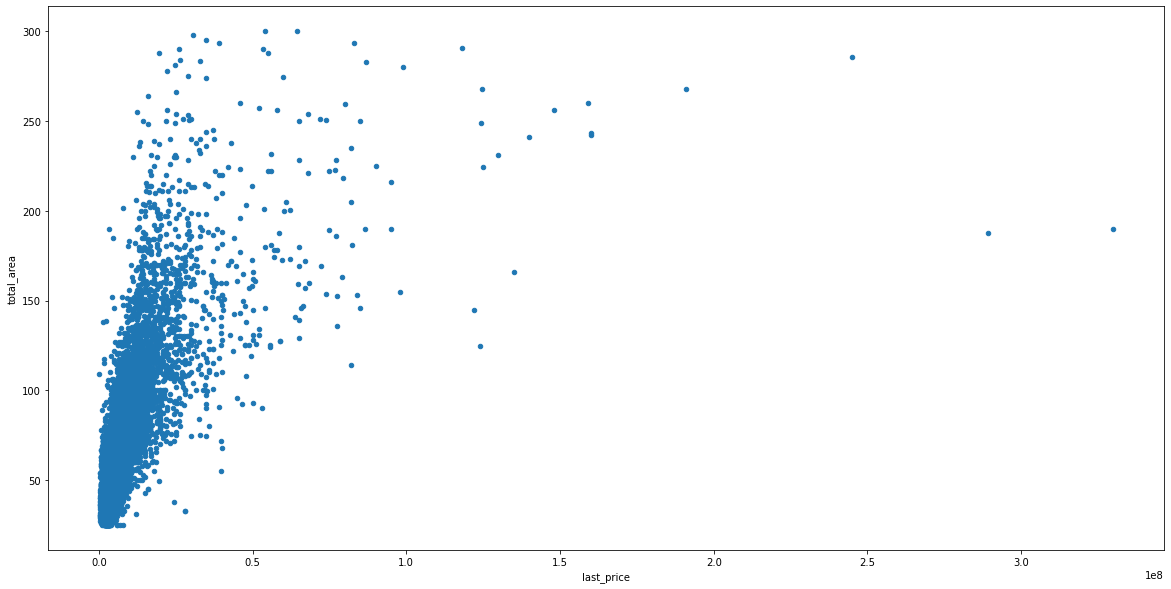

In [125]:
df.plot.scatter(x='last_price', y='total_area', figsize=(20,10))

In [126]:
df[['last_price', 'total_area']].corr()

,last_price,total_area
last_price,1.000000,0.674547
total_area,0.674547,1.000000


<AxesSubplot:xlabel='last_price', ylabel='living_area'>

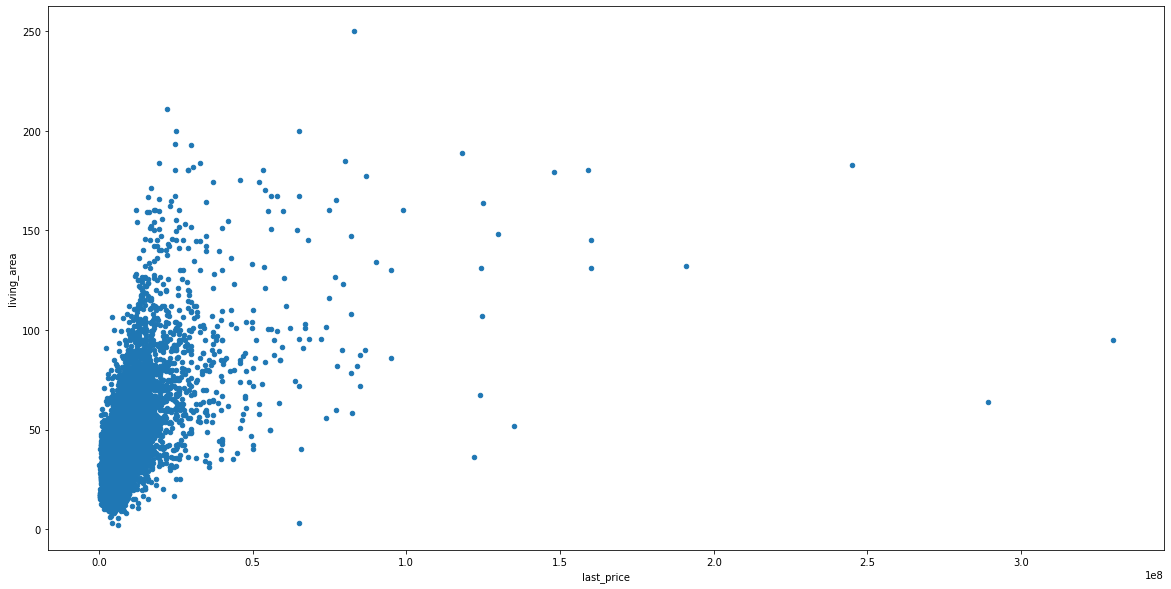

In [127]:
df.plot.scatter(x='last_price', y='living_area', figsize=(20,10))

In [128]:
df[['last_price', 'living_area']].corr()

,last_price,living_area
last_price,1.000000,0.577076
living_area,0.577076,1.000000


<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

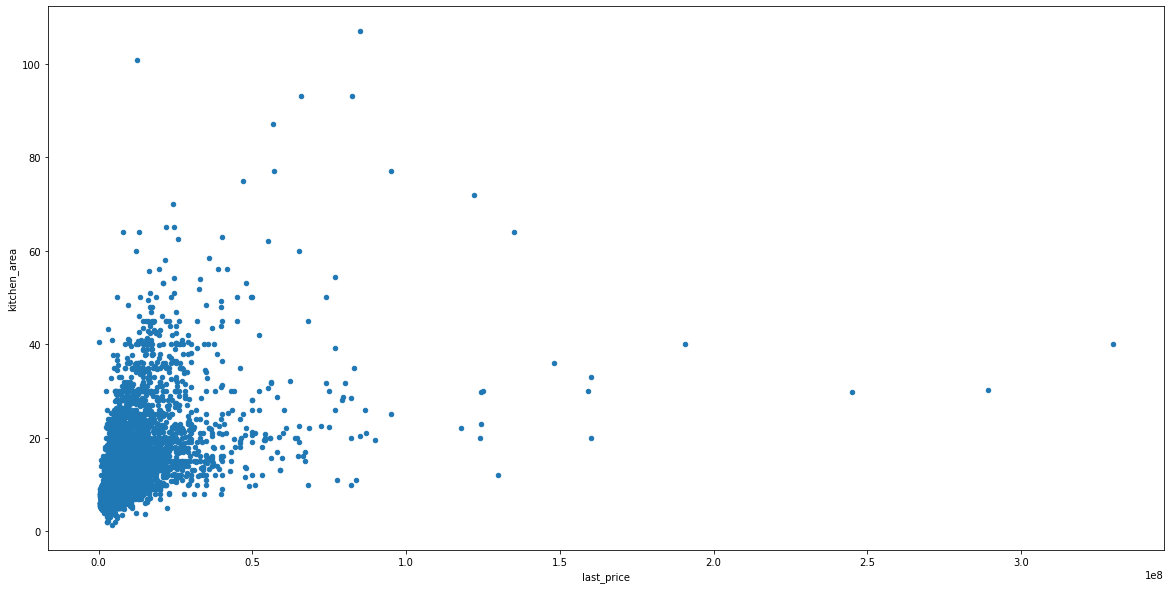

In [129]:
df.plot.scatter(x='last_price', y='kitchen_area', figsize=(20,10))

In [130]:
df[['last_price', 'kitchen_area']].corr()

,last_price,kitchen_area
last_price,1.000000,0.516908
kitchen_area,0.516908,1.000000


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

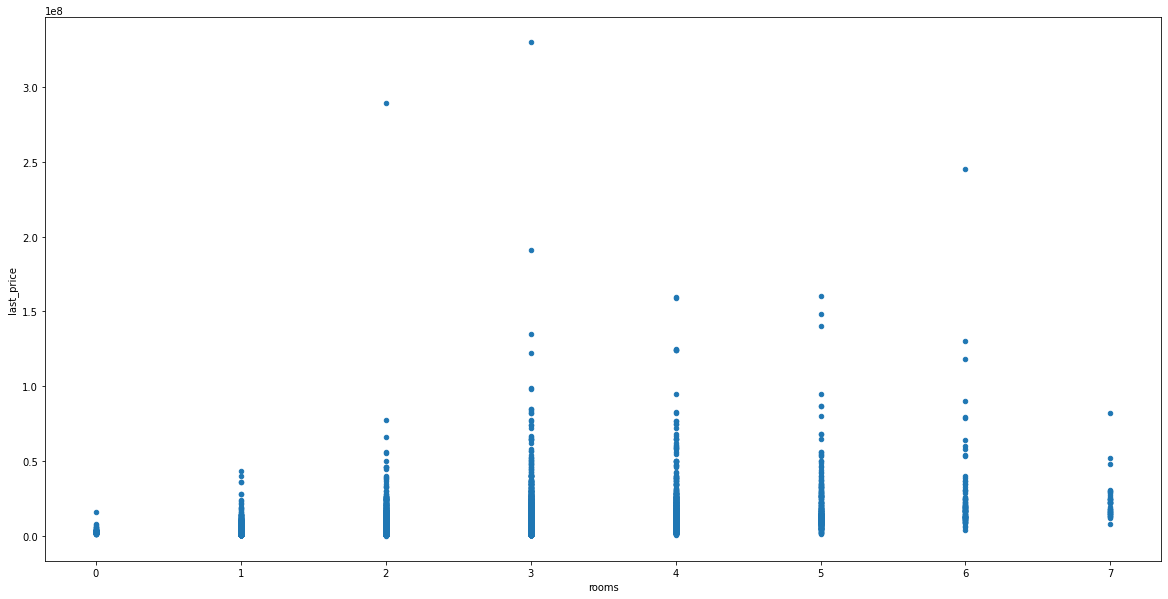

In [131]:
df.plot.scatter(x='rooms', y='last_price', figsize=(20,10))

In [132]:
df[['last_price', 'rooms']].corr()

,last_price,rooms
last_price,1.000000,0.385099
rooms,0.385099,1.000000


In [133]:
price_floor_type = df.pivot_table(index='floor_type', values='last_price', aggfunc=['median', 'mean']).droplevel(level=1, axis=1)
price_floor_type

,median,mean
floor_type,,
Другой,4840000.0,6.537731e+06
Первый,3900000.0,4.743277e+06
Последний,4300000.0,6.191615e+06


<AxesSubplot:xlabel='floor_type', ylabel='mean'>

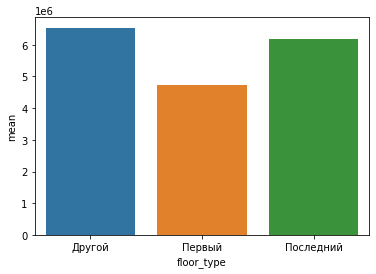

In [134]:
sns.barplot(data = price_floor_type, x = price_floor_type.index, y = 'mean')

In [135]:
price_day_pivot = df.pivot_table(index='day_publ',
                                  values= 'last_price',
                                  aggfunc=['median', 'mean']).droplevel(level=1, axis=1)
price_day_pivot

,median,mean
day_publ,,
0,4650000.0,6.283283e+06
1,4700000.0,6.258799e+06
2,4700000.0,6.273075e+06
3,4625000.0,6.500248e+06
4,4580000.0,6.230526e+06
5,4567500.0,6.101546e+06
6,4500000.0,5.956953e+06


<AxesSubplot:xlabel='day_publ', ylabel='median'>

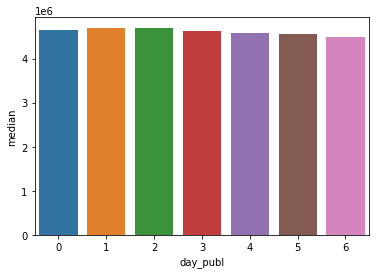

In [136]:
sns.barplot(data = price_day_pivot, x = price_day_pivot.index, y = 'median')

Зависимости стоимости недвижимости от дня публикации нет

In [137]:
price_month_pivot = df.pivot_table(index='month_publ',
                                  values= 'last_price',
                                  aggfunc=['median', 'mean']).droplevel(level=1, axis=1)
price_month_pivot

,median,mean
month_publ,,
1,4600000.0,6.360361e+06
2,4650000.0,6.262872e+06
3,4650000.0,6.210893e+06
4,4800000.0,6.425376e+06
5,4500000.0,6.208309e+06
6,4400000.0,6.166683e+06
7,4600000.0,6.230231e+06
8,4600000.0,6.345516e+06
9,4700000.0,6.297343e+06


<AxesSubplot:xlabel='month_publ', ylabel='median'>

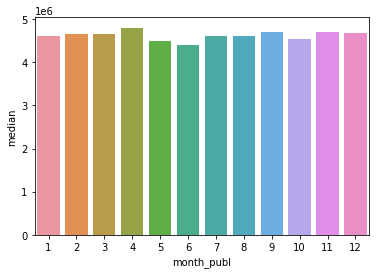

In [138]:
sns.barplot(data = price_month_pivot, x = price_month_pivot.index, y = 'median')

Зависимости стоимости от месяца публикации практически нет, однако обнаружено повышение стоимости в апреле, снижение в мае и июне, затем стоимость возвращается к привычной динамике.

In [139]:
price_year_pivot = df.pivot_table(index='year_publ',
                                  values= 'last_price',
                                  aggfunc=['median', 'mean']).droplevel(level=1, axis=1)
price_year_pivot

,median,mean
year_publ,,
2014,7500000.0,1.236812e+07
2015,5147000.0,7.967454e+06
2016,4550000.0,6.515513e+06
2017,4500000.0,6.174607e+06
2018,4600000.0,5.883782e+06
2019,5099000.0,6.607512e+06


<AxesSubplot:xlabel='year_publ', ylabel='median'>

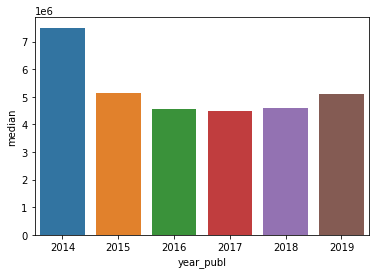

In [140]:
sns.barplot(data = price_year_pivot, x = price_year_pivot.index, y = 'median')

Обнаружено резкое падение после 2014 и постепенное снижение до 2017, а затем возрастание. Рассмотрим другие метрики, которые изменялись с годами.

Text(0, 0.5, 'Количество объявлений')

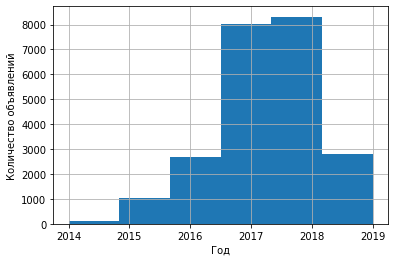

In [141]:
df['year_publ'].hist(bins = 6)
plt.xlabel('Год')
plt.ylabel('Количество объявлений')

Количество объявлений в 2014 году было минимальным. Затем наблюдается резкое возрастание до 2017 года и малое возрастание до 2018 года, после чего резкий спад.

Рассмотри распределение площадей.

<AxesSubplot:xlabel='year_publ', ylabel='total_area'>

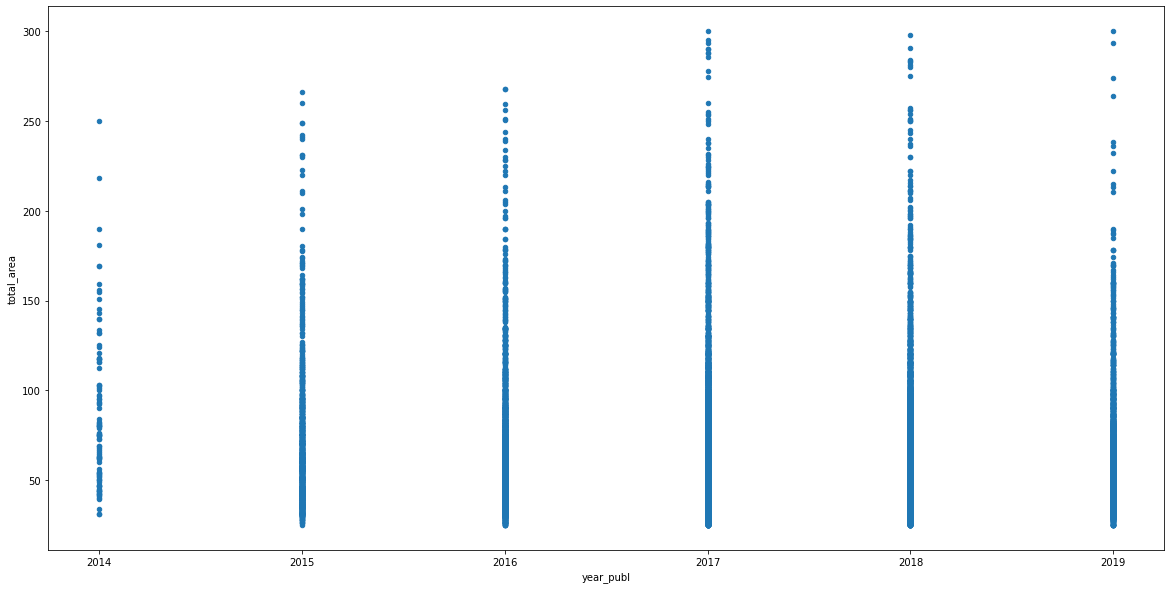

In [142]:
df.plot.scatter(x='year_publ', y='total_area', figsize=(20,10))

В 2017 и позже объявлений, в которых общая площадь квартиры больше 250 кв. метров, стало больше.

Также рассмотрим влияние фактора, который отсутствует в исходном датасете. В связи с удобством расчета за недвижимость платили в долларовом эквиваленте. Рассмотрим изменение средней цены доллара по годам.

In [143]:
doll_rub = pd.DataFrame({'year':['2014', '2015', '2016', '2017', '2018', '2019'],
              'doll_to_ruble':[38.33, 61.15, 66.96, 58.25, 62.78, 64.55]})

<AxesSubplot:xlabel='year', ylabel='doll_to_ruble'>

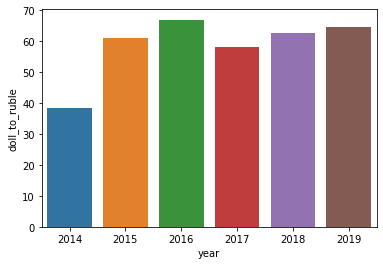

In [144]:
sns.barplot(data = doll_rub, x = 'year', y = 'doll_to_ruble')

В 2014 году доллар имел наименьшую стоимость, затем началось возрастание его цены, равно как и падение цен на недвижимость. Такая связь сохраняется до 2017 году. В 2017 году стоимость доллара снова упала, а цена на недвижимость упала на малую часть. Затем при возрастании стоимости доллара цена недвижимости стала возрастать.

#### Вывод

Обнаружена средняя корреляция между ценой и площадью объекта. При этом зависимости цены от жилой площади и площади кухни также средние. Зависимость цены от количества комнат низкая. Зависимость от даты публикации отсутствует. Также замечена зависимость цены недвижимости от типа этажа: чем выше находится квартира - тем больше ее стоимость.
Замечено изменение цен на квартиры по годам.
Так в 2014 году при минимальной стоимости американского доллара количество объявлений о продаже квартир было минимальным. Затем при возрастании курса количество объявленией начало возрастать. Когда курс перестал изменяться более чем на 10 рублей, количество объявлений резко увеличилось, в частности, и количество объявлений с большей площадью квартир. При этом динамика средней стоимости недвижимости стала более стабильной.

### 10 населенных пунктов с наибольшим количеством объявлений

Найдем 10 населенных пунктов, являющиеся лидерами по количеству объявлений:

In [146]:
top_10 = df.pivot_table(index = 'locality_name', 
                        values = 'price_for_meter',
                        aggfunc = ['count', 'mean']
                       ).droplevel(level=1, axis=1).sort_values(by = 'count',ascending = False).head(10)
top_10

,count,mean
locality_name,,
Санкт-Петербург,15261,114011.176610
поселок Мурино,516,84922.526479
поселок Шушары,432,78133.140688
Всеволожск,387,68550.063298
Пушкин,361,103066.885367
Колпино,334,75272.563607
поселок Парголово,323,90145.178908
Гатчина,303,68625.141404
деревня Кудрово,285,92095.414196


In [147]:
top_10=top_10.rename(columns={'count':'adv_count', 'mean':'price_for_meter'})
top_10['price_for_meter'] = round(top_10['price_for_meter'], 2)
top_10

,adv_count,price_for_meter
locality_name,,
Санкт-Петербург,15261,114011.18
поселок Мурино,516,84922.53
поселок Шушары,432,78133.14
Всеволожск,387,68550.06
Пушкин,361,103066.89
Колпино,334,75272.56
поселок Парголово,323,90145.18
Гатчина,303,68625.14
деревня Кудрово,285,92095.41


Рассмотрим стоимость квадратного метра в данных населенных пунктах на графике. Слева город с наибольним количеством объявлений, справа - с наименьшим.

<AxesSubplot:xlabel='locality_name', ylabel='price_for_meter'>

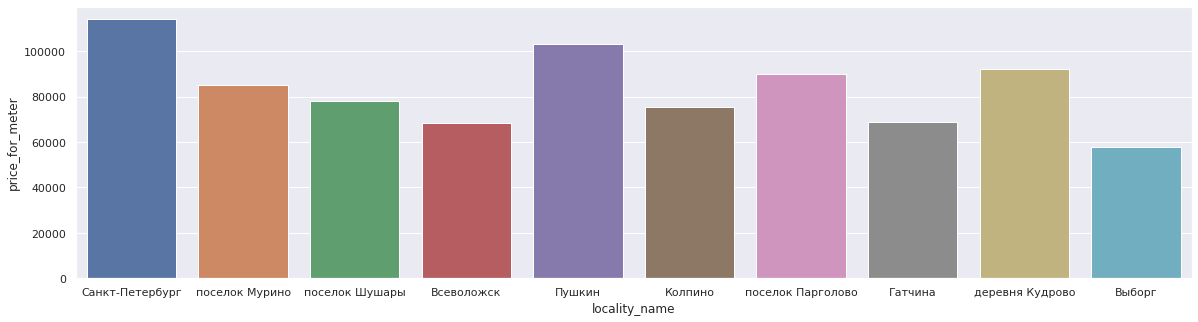

In [148]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = top_10, x = top_10.index, y = 'price_for_meter')

#### Вывод

Среди населенных пунктов с наибольшим количеством объявлений:
1. Санкт-Петербург (15261);
2. Поселок Мурино (516);
3. Поселок Шушары (431).

При этом из них наибольшую цену за квадратный метр имеют:
1. Санкт-Петербург (114011 р.);
2. Пушкин (103066 р.);
3. Деревня Кудрово (92095 р.)

Наименьшую имеют:
1. Выборг (57823 р.);
2. Всеволжск (68750 р.);
3. Гатчина (68625 р.)

### Зависимость стоимости от расстояния до центра

In [149]:
spb_price_center = df[df['locality_name'] == 'Санкт-Петербург'].pivot_table(
    index='centers_km',
    values = 'last_price',
    aggfunc = 'mean')
spb_price_center = spb_price_center.rename(columns={'last_price':'mean_price_on_km'})
spb_price_center

,mean_price_on_km
centers_km,
0.0,3.296865e+07
1.0,2.054978e+07
2.0,1.606513e+07
3.0,1.073481e+07
4.0,1.172561e+07
5.0,1.255023e+07
6.0,1.378413e+07
7.0,1.430190e+07
8.0,9.121248e+06


<AxesSubplot:xlabel='centers_km', ylabel='mean_price_on_km'>

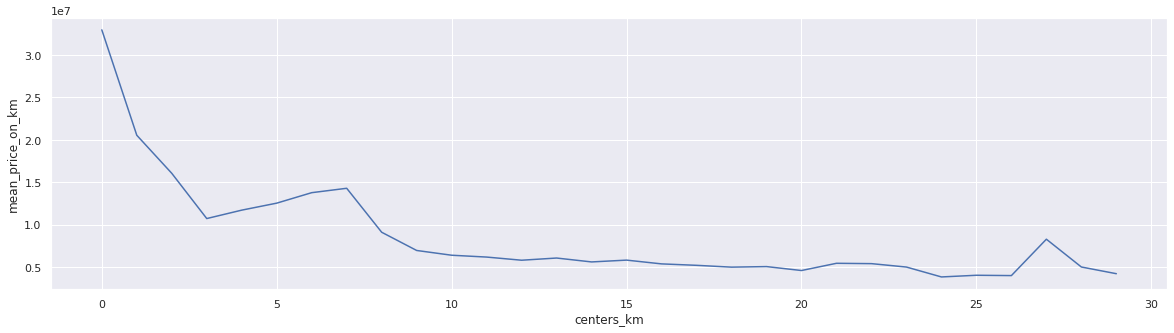

In [150]:
sns.lineplot(data=spb_price_center, x= spb_price_center.index, y='mean_price_on_km')

В частности до 10-го км:

<AxesSubplot:xlabel='centers_km', ylabel='mean_price_on_km'>

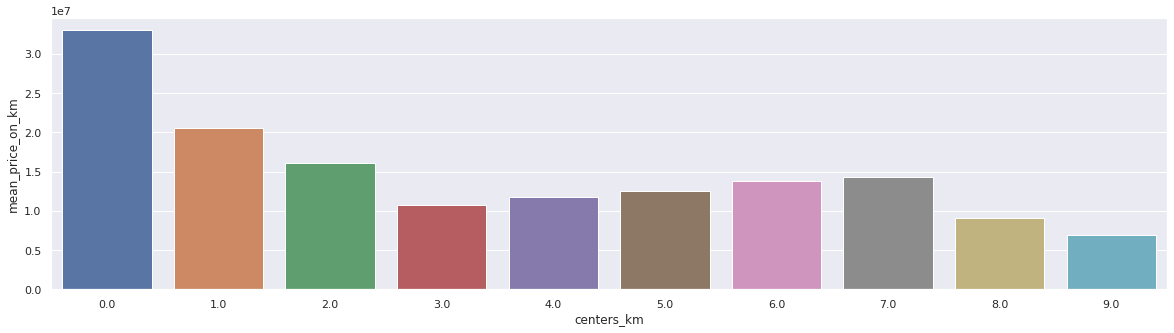

In [151]:
sns.barplot(data=spb_price_center[spb_price_center.index<10],
            x= spb_price_center[spb_price_center.index<10].index,
            y='mean_price_on_km')

После 25-го км:

<AxesSubplot:xlabel='centers_km', ylabel='mean_price_on_km'>

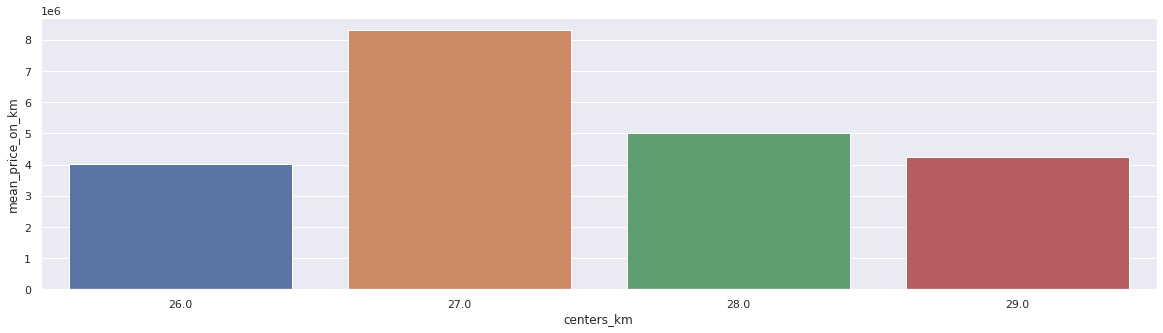

In [152]:
sns.barplot(data=spb_price_center[spb_price_center.index>25],
            x= spb_price_center[spb_price_center.index>25].index,
            y='mean_price_on_km')

Обнаружено:
- Неестественный подъем в районе 5 км;
- Выброс на 27-м км.

**От 3-го до 5-го км**

In [153]:
df_center_km_near = df.query("centers_km > 2 & centers_km < 6 & locality_name == 'Санкт-Петербург'" ).pivot_table(
                                    index=['centers_km', 'floor_type'],
                                    values='last_price',
                                    aggfunc='count'
                                   ).reset_index()

df_center_km_near['mean_count'] = round((df_center_km_near['last_price'] / ( 
    df_center_km_near.groupby('centers_km')['last_price'].transform('sum'))), 2)
df_center_km_near

,centers_km,floor_type,last_price,mean_count
0,3.0,Другой,203,0.61
1,3.0,Первый,53,0.16
2,3.0,Последний,76,0.23
3,4.0,Другой,475,0.72
4,4.0,Первый,73,0.11
5,4.0,Последний,108,0.16
6,5.0,Другой,652,0.76
7,5.0,Первый,77,0.09
8,5.0,Последний,129,0.15


<AxesSubplot:xlabel='centers_km', ylabel='last_price'>

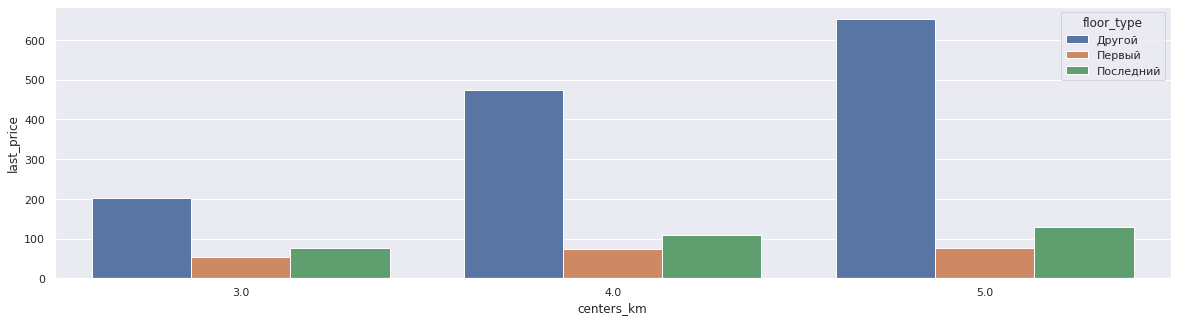

In [154]:
sns.barplot(data = df_center_km_near,
           x = 'centers_km',
           y = 'last_price',
           hue = 'floor_type')

<AxesSubplot:xlabel='centers_km', ylabel='mean_count'>

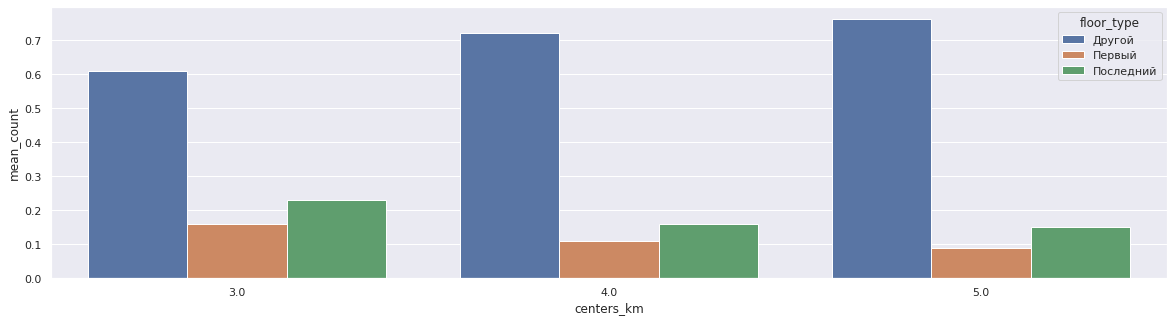

In [155]:
sns.barplot(data = df_center_km_near,
           x = 'centers_km',
           y = 'mean_count',
           hue = 'floor_type')

По графикам видно, что общее количество объектов недвижимости увеличивается, так как увеличивается количество квартир по типам, но уменьшается доля квартир типа `Первый` и `Последний`. При этом здания, расположенные на 3-м км входят в район исторического центра, а здания 5-го км находятся на его окраине и близ железнодорожных вокзалов.

**27 км**

In [156]:
df.query("locality_name == 'Санкт-Петербург' & centers_km==27")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,balconu,price_for_meter,day_publ,month_publ,year_publ,floor_type,centers_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,0.0,NaN,128.0,0,193918.918919,1,11,2017,Другой,27.0
5961,6,2250000.0,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,0.0,NaN,178.0,0,70312.500000,1,2,2018,Последний,27.0


К выбросу на 27-м км привело наличие всего двух объектов недвижимости, стоимость одного из которых составляем 14.35 млн, а второго 2,250 млн - среднее этих значений составляет 8,3 млню рублей в то время, как средняя стоимость недвижимости на соседних километрах ниже 5 млн. рублей

#### Вывод

В соответствии с представленными данными, чем дальше квартира находится от центра, тем меньше ее стоимость, однако обнаружен выброс на 5-м км, который является границей исторического центра города и приближен к вокзалам. Также обнаружен выброс на 27-м км, который произошел из-за наличия всего двух объектом недвижимости на данном радиусе, а стоимость одного из объектов сильно превышает второй

### Общий вывод

#### Содержание файла

Были обнаружены пропущенные и сомнительные значения

#### Предварительный анализ

1. Были намечены задачи для предобработки данных;
2. Обнаружены пропуски в данных, заполненных автоматически, также отсутсвуют данные о справочных факторах, например высота дома. В частности пропуски присутствуют в столбцах, обозначающих расстояние до определенных объектов. Их количество говорит о том, что данные были взяты из другой БД. Подобное могло случиться ввиду неправильного формата ввода адреса пользователем. Рекомендуется автоматизировать сбор данной информации путем автоматического переформатирования адреса на этапе заполнения объявления.

#### Предобработка данных

Были устранены пропуски и отфильтрованы редкие значения. Приведены названия населенных пунктов к единому формату. Рекомендуется внести изменения в форму подачи объявления:
- Введение ограничений на вводимые параметры;
- Автоматическое определение общих параметров для квартир, расположенных в одном доме.

#### Исследовательский анализ данных

Большинство объектов недвижимости представляют собой квартиры со следующими параметрами:
- Площадь до 100 кв. метров;
- Жилая площадь 15-20 или 30 кв. метров;
- Площадь кухни от 5 до 11 кв. метров;
- Цена до 8 млн. рублей;
- Количество комнат от одной до трех;
- Высота потолков 2,5 или 2,65 метров;
- Квартира находится в пяти- или девятиэтажном здании;
- Квартира находится между первым и вторым этажами;
- Дом находится в спальном районе в радиусе 5 или 10-16 километров от центра города;
- Расстояние до аэропорта не менее 10 километров;

При этом была замечена динамика подачи объявлений о продаже квартиры. Так наименьшее количество объявлений приходится на выходные (на неделе) и в праздники и предпраздничные периоды (январь, май, декабрь). Летом количество объявлений держится на среднем уровне.

#### Изучение времени продажи квартиры

В общей сложности квартиры продаются до полугода, однако большинство в течение трех месяцев. При этом отмечена связь закрытия объявлений в определенные промежутки времени (неделя, полтора месяца, два месяца и три месяца), связанная с правилами платформы.

#### Изучение факторов, влияющих на стоимость недвижимости

В основном стоимость квартиры зависит от общей площади, соответственно, присутствует зависимость от жилой площади и площади кухни. Количество комнат также влияет на стоимость квартиры, но меньше. Замечена сильная зависимость цены от этажа квартиры - ниже находится помещение, тем меньше его стоимость. Нет зависимость цены недвижимости от дня и месяца публикации, однако замечена связь с годами подачи объявления:
- Наибольшая стоимость приходится на 2014, когда количество объявлений было минимальным, а стоимость доллара в рублях наименьшей;
- После 2014 происходит резкий спад стоимости недвижимость - увеличивается количество объявлений, как и стоимость доллара;
- В период 2016 - 2018 стоимость практически не изменяется, однако количество объявлений в 2017 году резко увеличивается и на малую часть в 2018. В 2017 году курс доллара падает и увеличивается в 2018;
- В 2019 стоимость увеличивает, а количество объявлений резко уменьшается, курс доллара увеличивается лишь на малую часть.
Данные зависимости могут быть связаны с тем, что сделки с недвижимостью производились в долларах из-за удобства расчета. В период 2016-2018 годом наблюдается относительная стабильность стоимости доллара в рублях, из-за чего увеличивается количество объявлений, а цена недвижимости практически не изменяется. В 2019 году стоимость недвижимости возрастает за счет падения количества объявлений.

Также определено влияние удаленности от центра на стоимость квартиры в Санкт-Петербурге. Так наибольшие стоимость квадратного метра имеют квартиры приближенные к центру города до 2 км, затем спад на 3-м км. В районе 5-го км наблюдается выброс, который может быть связан с нахождением на границе исторического центра и приближению к транспортным пунктам и достопримечательностям.

#### Населенные пункты с наибольшим количество объявлений

Был определен список из 10 населенных пунктов с наибольшим количеством объявлений о продаже недвижимости. Подавляющее большинство объявлений представлено в городе Санкт-Петербург (более 15 тыс.), затем идет резкий спад до 500 и 400 объявлений в поселках Мурино и Шушары.
Среди этих 10 населенных пунктов наибольную среднюю стоимость за квадратный метр имеют:
- Санкт-Петербург и Пушкин - более 100 тыс. рублей за кв. метр;
- Деревня Кудрово - 92 тыс. рублей за кв. метр.
Наименьшую среднюю стоимость за квадратный метр имеют:
- Выборг - ~58 тыс. рублей за кв. метр;
- Всеволжск и Гатчина - ~68.5 тыс. рублей за кв. метр

В данной работе были рассмотрены факторы, влиящие на стоимость квартир, однако установить, что какой-либо из них подавляюще влияет на стоимость квартиры, не является возможным, за исключением общей площади. В базе отсутствуют данные о годе постройки дома, его состоянии, даты проведения ремонта, расположении инфраструктуры и объектов социального обеспечения (школы, больницы и т.п.).

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [X]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод